In [1]:
CONSTRAINT_TOOLS = '/scratch/ucgd/lustre-work/quinlan/u6018199/constraint-tools'
CONSTRAINT_TOOLS_DATA = '/scratch/ucgd/lustre-work/quinlan/data-shared/constraint-tools'

import sys
sys.path.append(f'{CONSTRAINT_TOOLS}/utilities')

LOWER_DELETION_SIZE_LIMIT = 10000
UPPER_DELETION_SIZE_LIMIT = 10000
DELETION_ALLELE_FREQ_THRESHOLD = 0.00001

# Filter out false deletions: 
SUSPICIOUS_DELETION_SIZE_THRESHOLD = 1000000

DELETION_CLASS = 'observed' # TOPMED 

# previously used: 'constraint-labeled'
# 'genehancer' requires more effort 
ENHANCERS_CLASS = 'khurana' 

## Get windows straddling enhancers, and intersect those windows with deletions

In [2]:
from shell import shell
import pandas as pd

pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 200)

def intersect_enhancer_straddling_windows_with_deletions(deletion_type, window_size): 
  windows_with_deletions = f'{CONSTRAINT_TOOLS_DATA}/enhancer-straddling-windows/{ENHANCERS_CLASS}/enhancer-straddling-windows-intersect-{deletion_type}-{DELETION_CLASS}-deletions.bed'

  intersect_script = f'{CONSTRAINT_TOOLS}/experiments/germline-model/chen-et-al-2022/intersect-enhancer-straddling-windows-with-deletions.sh'

  cmd = (
    f'bash '
    f'{intersect_script} '
    f'{DELETION_CLASS} {windows_with_deletions} '
    f'{deletion_type} '
    f'{LOWER_DELETION_SIZE_LIMIT} {UPPER_DELETION_SIZE_LIMIT} {DELETION_ALLELE_FREQ_THRESHOLD} '
    f'{SUSPICIOUS_DELETION_SIZE_THRESHOLD} '
    f'{window_size} '
    f'{ENHANCERS_CLASS}'
  )
  print(shell(cmd))

  df = pd.read_csv(
    windows_with_deletions, 
    sep='\t',
  )

  return df 

intersect_enhancer_straddling_windows_with_deletions(
  deletion_type='short', 
  window_size=10,
) 

Wrote windows with deletion overlaps to: /scratch/ucgd/lustre-work/quinlan/data-shared/constraint-tools/enhancer-straddling-windows/khurana/enhancer-straddling-windows-intersect-short-observed-deletions.bed



window_chrom  window_start  window_end chromosome_hg38  start_hg38  \
0             chr1       2332455     2332466            chr1     2332361   
1             chr1       2332455     2332466            chr1     2332361   
2             chr1       2588555     2588566            chr1     2587361   
3             chr1       2596255     2596266            chr1     2596161   
4             chr1       2596255     2596266            chr1     2596161   
...            ...           ...         ...             ...         ...   
55001         chrX     155558033   155558044            chrX   155557739   
55002         chrX     155558033   155558044            chrX   155557739   
55003         chrX     155578033   155578044            chrX   155577139   
55004         chrX     155617833   155617844            chrX   155617539   
55005         chrX     155687333   155687344            chrX   155686739   

        end_hg38  outDegree  indegreeAveGene  indegreeVarGene  \
0        2332561          6        28.000000        42.666667   
1        2332561          6        28.000000        42.666667   
2        2589761          9        28.222222        86.395062   
3        2596361          2        34.500000        56.250000   
4        2596361          2        34.500000        56.250000   
...          ...        ...              ...              ...   
55001  155558339          1        18.000000         0.000000   
55002  155558339          1        18.000000         0.000000   
55003  155578939          3        14.000000         8.000000   
55004  155618139          3        14.000000         8.000000   
55005  155687939          2        18.500000         0.250000   

       indispenAveGene  indispenVarGene  numTissueAve  numTissueVar  \
0             0.540501         0.151947      2.000000      0.333333   
1             0.540501         0.151947      2.000000      0.333333   
2             0.608295         0.128440      8.333333     27.333333   
3             0.137321         0.000000      1.000000      0.000000   
4             0.137321         0.000000      1.000000      0.000000   
...                ...              ...           ...           ...   
55001         0.879259         0.000000      1.000000      0.000000   
55002         0.879259         0.000000      1.000000      0.000000   
55003         0.564644         0.098983      1.333333      0.222222   
55004         0.564644         0.098983      1.000000      0.000000   
55005         0.709217         0.028914      2.000000      0.000000   

       closeAveGene  closeVarGene  degreeAveGene  degreeVarGene  pgrkAveGene  \
0          0.040223  2.030436e-03       0.000133   3.471361e-09     0.000023   
1          0.040223  2.030436e-03       0.000133   3.471361e-09     0.000023   
2          0.034457  1.075550e-03       0.000122   8.239879e-10     0.000016   
3          0.000130  7.998072e-10       0.000130   7.998072e-10     0.000014   
4          0.000130  7.998072e-10       0.000130   7.998072e-10     0.000014   
...             ...           ...            ...            ...          ...   
55001      0.083635  0.000000e+00       0.000072   0.000000e+00     0.000021   
55002      0.083635  0.000000e+00       0.000072   0.000000e+00     0.000021   
55003      0.027908  1.552708e-03       0.000054   1.548269e-10     0.000011   
55004      0.027908  1.552708e-03       0.000054   1.548269e-10     0.000011   
55005      0.041853  1.745694e-03       0.000074   3.554699e-12     0.000019   

        pgrkVarGene     egAveGene     egVarGene  SG1_outDegree  \
0      1.072952e-09  1.501623e-05  1.127179e-09            6.0   
1      1.072952e-09  1.501623e-05  1.127179e-09            6.0   
2      1.270915e-10  5.106490e-08  9.971648e-15            6.0   
3      2.705123e-11  2.506624e-37  2.965265e-75            0.0   
4      2.705123e-11  2.506624e-37  2.965265e-75            0.0   
...             ...           ...           ...            ...   
55001  0.000000e+00  1.117896e-05  0

## Filter enhancers by network properties

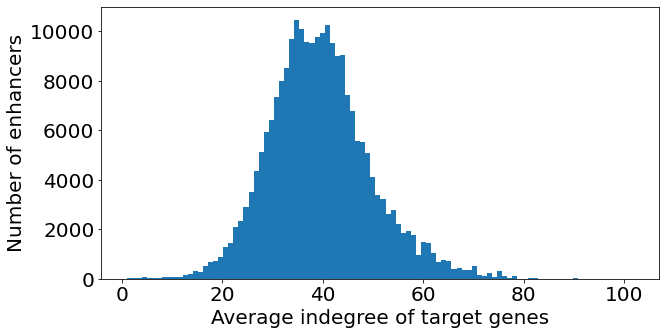

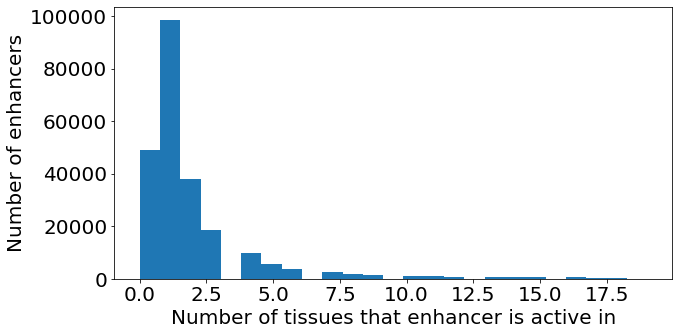

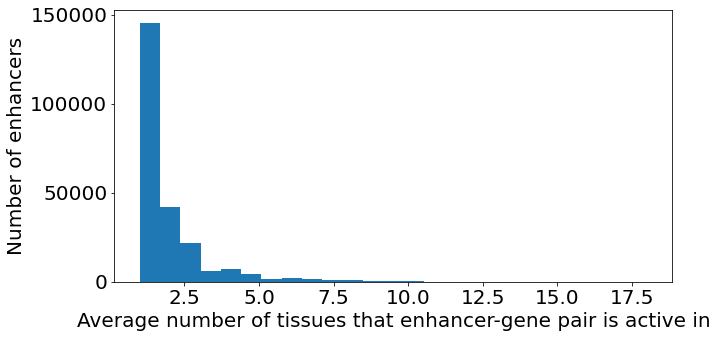

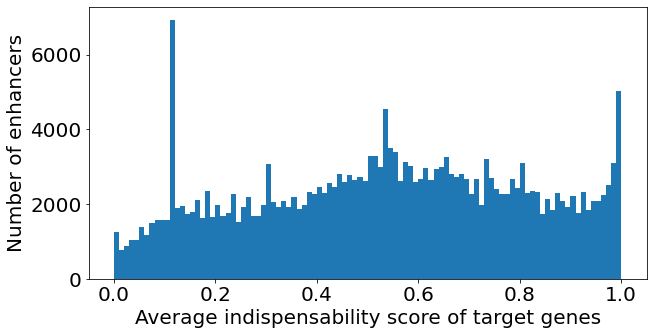

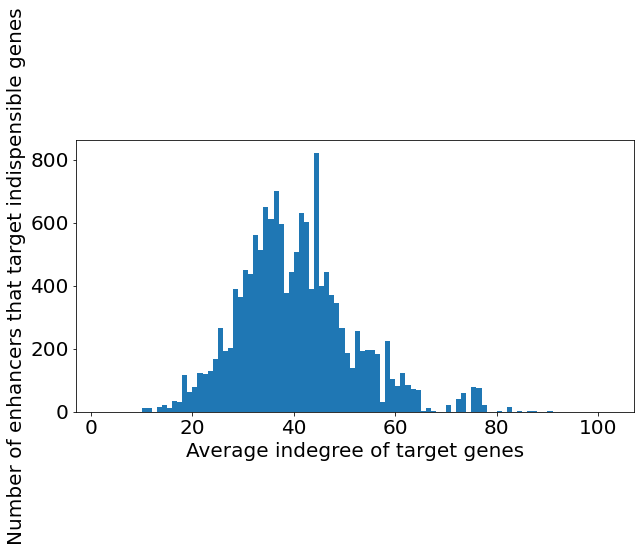

chromosome_hg38  start_hg38  end_hg38  outDegree  indegreeAveGene  \
118               chr1     1591020   1591220          4             47.5   
654               chr1     7481740   7484140          1             47.0   
669               chr1     7769540   7769740          1             47.0   
671               chr1     7771140   7771740          1             47.0   
675               chr1     7798540   7798940          1             47.0   
...                ...         ...       ...        ...              ...   
234185           chr22    41110996  41111796          1             49.0   
234186           chr22    41116996  41118196          2             55.5   
234190           chr22    41132396  41132996          1             49.0   
234271           chr22    41630196  41630396          1             32.0   
234904           chr22    46900504  46901704          1             23.0   

        indegreeVarGene  indispenAveGene  indispenVarGene  numTissueAve  \
118               10.25         0.977523         0.000171           1.0   
654                0.00         0.957080         0.000000           1.0   
669                0.00         0.957080         0.000000           1.0   
671                0.00         0.957080         0.000000           1.0   
675                0.00         0.957080         0.000000           1.0   
...                 ...              ...              ...           ...   
234185             0.00         1.000000         0.000000           1.0   
234186            42.25         0.986647         0.000178           3.5   
234190             0.00         1.000000         0.000000           1.0   
234271             0.00         0.973295         0.000000           1.0   
234904             0.00         0.991236         0.000000           1.0   

        numTissueVar  closeAveGene  closeVarGene  degreeAveGene  \
118             0.00      0.047830      0.002776       0.000196   
654             0.00      0.081167      0.000000       0.000215   
669             0.00      0.081167      0.000000       0.000215   
671             0.00      0.081167      0.000000       0.000215   
675             0.00      0.081167      0.000000       0.000215   
...              ...           ...           ...            ...   
234185          0.00      0.045320      0.000000       0.002828   
234186          6.25      0.072106      0.000717       0.001629   
234190          0.00      0.045320      0.000000       0.002828   
234271          0.00      0.177930      0.000000       0.000490   
234904          0.00      0.000411      0.000000       0.000136   

        degreeVarGene  pgrkAveGene   pgrkVarGene     egAveGene     egVarGene  \
118      5.189860e-10     0.000025  6.921715e-10  1.442181e-04  6.239396e-08   
654      0.000000e+00     0.000038  0.000000e+00  5.217771e-07  0.000000e+00   
669      0.000000e+00     0.000038  0.000000e+00  5.217771e-07  0.000000e+00   
671      0.000000e+00     0.000038  0.000000e+00  5.217771e-07  0.000000e+00   
675      0.000000e+00     0.000038  0.000000e+00  5.217771e-07  0.000000e+00   
...               ...          ...           ...           ...           ...   
234185   0.000000e+00     0.000308  0.000000e+00  3.155289e-15  0.000000e+00   
234186   1.437861e-06     0.000218  8.043620e-09  5.209821e-06  2.714224e-11   
234190   0.000000e+00     0.000308  0.000000e+00  3.155289e-15  0.000000e+00   
234271   0.000000e+00     0.001749  0.000000e+00  9.820156e-02  0.000000e+00   
234904   0.000000e+00     0.000018  0.000000e+00  1.356323e-32  0.000000e+00   

        SG1_outDegree  SG1_indegreeAveGene  SG1_indegreeVarGene  \
118               0.0                  0.0                  0.0   
654               0.0                  0.0                  0.0   
669               0.0                  0.0                  0.0   
671               0.0                  0.0                  0.0   
675               0.0                  0.0                  0.0   
...               ...    

In [3]:
import json 
import matplotlib.pyplot as plt

plt.rc('figure', figsize=(10, 5))
plt.rc('font', size=20)

def plot_enhancer_network_feature_distribution(average_gene_indispensabilty_threshold=0.95): 
  with open(f'{CONSTRAINT_TOOLS_DATA}/khurana/all-enhancers-with-network-features.hg38.sorted.json', 'r') as f:
    columns = json.load(f)

  df = pd.read_csv(
    f'{CONSTRAINT_TOOLS_DATA}/khurana/all-enhancers-with-network-features.hg38.sorted.bed', 
    sep='\t',
    names=columns,
  )  

  regular_chromosomes = set(f'chr{str(id)}' for id in list(range(1,23)) + ['X', 'Y'])
  df = df[df['chromosome_hg38'].isin(regular_chromosomes)]

  df = df[
    (df['chromosome_hg38'] != 'chrX') &
    (df['chromosome_hg38'] != 'chrY')
  ]

  df['indegreeAveGene'].plot.hist(bins=100)
  plt.xlabel('Average indegree of target genes')
  plt.ylabel('Number of enhancers')
  plt.show()
  
  df['numTissue'].plot.hist(bins=25)
  plt.xlabel('Number of tissues that enhancer is active in')
  plt.ylabel('Number of enhancers')
  plt.show()

  
  df['numTissueAve'].plot.hist(bins=25)
  plt.xlabel('Average number of tissues that enhancer-gene pair is active in')
  plt.ylabel('Number of enhancers')
  plt.show()

  df['indispenAveGene'].plot.hist(bins=100)
  plt.xlabel('Average indispensability score of target genes')
  plt.ylabel('Number of enhancers')
  plt.show()

  df = df[df['indispenAveGene'] > average_gene_indispensabilty_threshold]
  df['indegreeAveGene'].plot.hist(bins=100)
  plt.xlabel('Average indegree of target genes')
  plt.ylabel('Number of enhancers that target indispensible genes')
  plt.show()

  return df 

plot_enhancer_network_feature_distribution()

In [4]:
def filter_1(df, gene_indegree_threshold=25): 
  # enhancers that are less redundant have lower GIDa (average gene indegree)
  df = df[df['indegreeAveGene'] < gene_indegree_threshold]
  return df  

filter_1(
  intersect_enhancer_straddling_windows_with_deletions(
    deletion_type='short', 
    window_size=40000,
  ), 
)

Wrote windows with deletion overlaps to: /scratch/ucgd/lustre-work/quinlan/data-shared/constraint-tools/enhancer-straddling-windows/khurana/enhancer-straddling-windows-intersect-short-observed-deletions.bed



window_chrom  window_start  window_end chromosome_hg38  start_hg38  \
13             chr1       2326260     2366261            chr1     2346161   
14             chr1       2326260     2366261            chr1     2346161   
15             chr1       2326260     2366261            chr1     2346161   
16             chr1       2326260     2366261            chr1     2346161   
23             chr1       2348460     2388461            chr1     2368161   
...             ...           ...         ...             ...         ...   
592400         chrX     155667338   155707339            chrX   155686739   
592401         chrX     155667338   155707339            chrX   155686739   
592402         chrX     155667338   155707339            chrX   155686739   
592403         chrX     155667338   155707339            chrX   155686739   
592404         chrX     155667338   155707339            chrX   155686739   

         end_hg38  outDegree  indegreeAveGene  indegreeVarGene  \
13        2346361          3             22.0         0.666667   
14        2346361          3             22.0         0.666667   
15        2346361          3             22.0         0.666667   
16        2346361          3             22.0         0.666667   
23        2368761          3             22.0         0.666667   
...           ...        ...              ...              ...   
592400  155687939          2             18.5         0.250000   
592401  155687939          2             18.5         0.250000   
592402  155687939          2             18.5         0.250000   
592403  155687939          2             18.5         0.250000   
592404  155687939          2             18.5         0.250000   

        indispenAveGene  indispenVarGene  numTissueAve  numTissueVar  \
13             0.707824         0.049214           1.0           0.0   
14             0.707824         0.049214           1.0           0.0   
15             0.707824         0.049214           1.0           0.0   
16             0.707824         0.049214           1.0           0.0   
23             0.707824         0.049214           1.0           0.0   
...                 ...              ...           ...           ...   
592400         0.709217         0.028914           2.0           0.0   
592401         0.709217         0.028914           2.0           0.0   
592402         0.709217         0.028914           2.0           0.0   
592403         0.709217         0.028914           2.0           0.0   
592404         0.709217         0.028914           2.0           0.0   

        closeAveGene  closeVarGene  degreeAveGene  degreeVarGene  pgrkAveGene  \
13          0.039912      0.000795       0.000097   5.055571e-11     0.000008   
14          0.039912      0.000795       0.000097   5.055571e-11     0.000008   
15          0.039912      0.000795       0.000097   5.055571e-11     0.000008   
16          0.039912      0.000795       0.000097   5.055571e-11     0.000008   
23          0.039912      0.000795       0.000097   5.055571e-11     0.000008   
...              ...           ...            ...            ...          ...   
592400      0.041853      0.001746       0.000074   3.554699e-12     0.000019   
592401      0.041853      0.001746       0.000074   3.554699e-12     0.000019   
592402      0.041853      0.001746       0.000074   3.554699e-12     0.000019   
592403      0.041853      0.001746       0.000074   3.554699e-12     0.000019   
592404      0.041853      0.001746       0.000074   3.554699e-12     0.000019   

         pgrkVarGene     egAveGene     egVarGene  SG1_outDegree  \
13      2.086705e-12  2.839922e-09  4.189292e-18            0.0   
14      2.086705e-12  2.839922e-09  4.189292e-18            0.0   
15      2.086705e-12  2.839922e-09  4.189292e-18            0.0   
16      2.086705e-12  2.839922e-09  4.189292e-18            0.0   
23      2.086705e-12  2.839922e-09  4.189292e-18            0.0   
...              ...           ...           ... 

In [5]:
def filter_2(df, enhancer_tissue_ubiquity_threshold=5): 
  # enhancers that are more pleiotropic have high ETU (enhancer tissue ubiquity)
  df = df[df['numTissue'] > enhancer_tissue_ubiquity_threshold]
  return df  

filter_2(
  intersect_enhancer_straddling_windows_with_deletions(
    deletion_type='short', 
    window_size=40000,
  ), 
)

Wrote windows with deletion overlaps to: /scratch/ucgd/lustre-work/quinlan/data-shared/constraint-tools/enhancer-straddling-windows/khurana/enhancer-straddling-windows-intersect-short-observed-deletions.bed



window_chrom  window_start  window_end chromosome_hg38  start_hg38  \
30             chr1       2377260     2417261            chr1     2396161   
31             chr1       2377260     2417261            chr1     2396161   
51             chr1       2568560     2608561            chr1     2587361   
52             chr1       2568560     2608561            chr1     2587361   
53             chr1       2568560     2608561            chr1     2587361   
...             ...           ...         ...             ...         ...   
592086         chrX     155037024   155077025            chrX   155055925   
592087         chrX     155037024   155077025            chrX   155055925   
592088         chrX     155037024   155077025            chrX   155055925   
592089         chrX     155037024   155077025            chrX   155055925   
592264         chrX     155195422   155235423            chrX   155214923   

         end_hg38  outDegree  indegreeAveGene  indegreeVarGene  \
30        2398361          9        26.000000        44.666667   
31        2398361          9        26.000000        44.666667   
51        2589761          9        28.222222        86.395062   
52        2589761          9        28.222222        86.395062   
53        2589761          9        28.222222        86.395062   
...           ...        ...              ...              ...   
592086  155058125         10        29.000000        39.200000   
592087  155058125         10        29.000000        39.200000   
592088  155058125         10        29.000000        39.200000   
592089  155058125         10        29.000000        39.200000   
592264  155215923          9        26.777778        75.061728   

        indispenAveGene  indispenVarGene  numTissueAve  numTissueVar  \
30             0.658999         0.130924      3.666667      5.111111   
31             0.658999         0.130924      3.666667      5.111111   
51             0.608295         0.128440      8.333333     27.333333   
52             0.608295         0.128440      8.333333     27.333333   
53             0.608295         0.128440      8.333333     27.333333   
...                 ...              ...           ...           ...   
592086         0.595842         0.096978      7.300000     29.010000   
592087         0.595842         0.096978      7.300000     29.010000   
592088         0.595842         0.096978      7.300000     29.010000   
592089         0.595842         0.096978      7.300000     29.010000   
592264         0.624677         0.108064      3.888889      5.654321   

        closeAveGene  closeVarGene  degreeAveGene  degreeVarGene  pgrkAveGene  \
30          0.047918      0.001603       0.000127   2.594140e-09     0.000022   
31          0.047918      0.001603       0.000127   2.594140e-09     0.000022   
51          0.034457      0.001076       0.000122   8.239879e-10     0.000016   
52          0.034457      0.001076       0.000122   8.239879e-10     0.000016   
53          0.034457      0.001076       0.000122   8.239879e-10     0.000016   
...              ...           ...            ...            ...          ...   
592086      0.019417      0.000969       0.000137   1.742655e-09     0.000017   
592087      0.019417      0.000969       0.000137   1.742655e-09     0.000017   
592088      0.019417      0.000969       0.000137   1.742655e-09     0.000017   
592089      0.019417      0.000969       0.000137   1.742655e-09     0.000017   
592264      0.021554      0.001031       0.000129   2.647153e-09     0.000018   

         pgrkVarGene     egAveGene     egVarGene  SG1_outDegree  \
30      7.683225e-10  1.006094e-05  8.005677e-10            9.0   
31      7.683225e-10  1.006094e-05  8.005677e-10            9.0   
51      1.270915e-10  5.106490e-08  9.971648e-15            6.0   
52      1.270915e-10  5.106490e-08  9.971648e-15            6.0   
53      1.270915e-10  5.106490e-08  9.971648e-15            6.0   
...              ...           ...           ... 

In [6]:
def filter_3(df, enhancer_gene_tissue_ubiquity_threshold=4): 
  # enhancers that are more pleiotropic have high EGTUa (enhancer-gene tissue ubiquity)
  df = df[df['numTissueAve'] > enhancer_gene_tissue_ubiquity_threshold]
  return df  

filter_3(
  intersect_enhancer_straddling_windows_with_deletions(
    deletion_type='short', 
    window_size=40000,
  ), 
)

Wrote windows with deletion overlaps to: /scratch/ucgd/lustre-work/quinlan/data-shared/constraint-tools/enhancer-straddling-windows/khurana/enhancer-straddling-windows-intersect-short-observed-deletions.bed



window_chrom  window_start  window_end chromosome_hg38  start_hg38  \
51             chr1       2568560     2608561            chr1     2587361   
52             chr1       2568560     2608561            chr1     2587361   
53             chr1       2568560     2608561            chr1     2587361   
54             chr1       2568560     2608561            chr1     2587361   
55             chr1       2568560     2608561            chr1     2587361   
...             ...           ...         ...             ...         ...   
592085         chrX     155037024   155077025            chrX   155055925   
592086         chrX     155037024   155077025            chrX   155055925   
592087         chrX     155037024   155077025            chrX   155055925   
592088         chrX     155037024   155077025            chrX   155055925   
592089         chrX     155037024   155077025            chrX   155055925   

         end_hg38  outDegree  indegreeAveGene  indegreeVarGene  \
51        2589761          9        28.222222        86.395062   
52        2589761          9        28.222222        86.395062   
53        2589761          9        28.222222        86.395062   
54        2589761          9        28.222222        86.395062   
55        2589761          9        28.222222        86.395062   
...           ...        ...              ...              ...   
592085  155058125         10        29.000000        39.200000   
592086  155058125         10        29.000000        39.200000   
592087  155058125         10        29.000000        39.200000   
592088  155058125         10        29.000000        39.200000   
592089  155058125         10        29.000000        39.200000   

        indispenAveGene  indispenVarGene  numTissueAve  numTissueVar  \
51             0.608295         0.128440      8.333333     27.333333   
52             0.608295         0.128440      8.333333     27.333333   
53             0.608295         0.128440      8.333333     27.333333   
54             0.608295         0.128440      8.333333     27.333333   
55             0.608295         0.128440      8.333333     27.333333   
...                 ...              ...           ...           ...   
592085         0.595842         0.096978      7.300000     29.010000   
592086         0.595842         0.096978      7.300000     29.010000   
592087         0.595842         0.096978      7.300000     29.010000   
592088         0.595842         0.096978      7.300000     29.010000   
592089         0.595842         0.096978      7.300000     29.010000   

        closeAveGene  closeVarGene  degreeAveGene  degreeVarGene  pgrkAveGene  \
51          0.034457      0.001076       0.000122   8.239879e-10     0.000016   
52          0.034457      0.001076       0.000122   8.239879e-10     0.000016   
53          0.034457      0.001076       0.000122   8.239879e-10     0.000016   
54          0.034457      0.001076       0.000122   8.239879e-10     0.000016   
55          0.034457      0.001076       0.000122   8.239879e-10     0.000016   
...              ...           ...            ...            ...          ...   
592085      0.019417      0.000969       0.000137   1.742655e-09     0.000017   
592086      0.019417      0.000969       0.000137   1.742655e-09     0.000017   
592087      0.019417      0.000969       0.000137   1.742655e-09     0.000017   
592088      0.019417      0.000969       0.000137   1.742655e-09     0.000017   
592089      0.019417      0.000969       0.000137   1.742655e-09     0.000017   

         pgrkVarGene     egAveGene     egVarGene  SG1_outDegree  \
51      1.270915e-10  5.106490e-08  9.971648e-15            6.0   
52      1.270915e-10  5.106490e-08  9.971648e-15            6.0   
53      1.270915e-10  5.106490e-08  9.971648e-15            6.0   
54      1.270915e-10  5.106490e-08  9.971648e-15            6.0   
55      1.270915e-10  5.106490e-08  9.971648e-15            6.0   
...              ...           ...           ... 

In [7]:
def filter_4(df, average_gene_indispensabilty_threshold=0.95): 
  # enhancers whose target genes have high average indispensability scores (GISa)
  df = df[df['indispenAveGene'] > average_gene_indispensabilty_threshold]
  return df  

filter_4(
  intersect_enhancer_straddling_windows_with_deletions(
    deletion_type='short', 
    window_size=40000,
  ), 
)

Wrote windows with deletion overlaps to: /scratch/ucgd/lustre-work/quinlan/data-shared/constraint-tools/enhancer-straddling-windows/khurana/enhancer-straddling-windows-intersect-short-observed-deletions.bed



window_chrom  window_start  window_end chromosome_hg38  start_hg38  \
1399           chr1       7462939     7502940            chr1     7481740   
1400           chr1       7462939     7502940            chr1     7481740   
1401           chr1       7462939     7502940            chr1     7481740   
1439           chr1       7749639     7789640            chr1     7769540   
1440           chr1       7749639     7789640            chr1     7769540   
...             ...           ...         ...             ...         ...   
591953         chrX     154834824   154874825            chrX   154853725   
591956         chrX     154865924   154905925            chrX   154885725   
591957         chrX     154865924   154905925            chrX   154885725   
591958         chrX     154865924   154905925            chrX   154885725   
591959         chrX     154865924   154905925            chrX   154885725   

         end_hg38  outDegree  indegreeAveGene  indegreeVarGene  \
1399      7484140          1        47.000000         0.000000   
1400      7484140          1        47.000000         0.000000   
1401      7484140          1        47.000000         0.000000   
1439      7769740          1        47.000000         0.000000   
1440      7769740          1        47.000000         0.000000   
...           ...        ...              ...              ...   
591953  154855925          3        23.333333        22.222222   
591956  154886125          1        30.000000         0.000000   
591957  154886125          1        30.000000         0.000000   
591958  154886125          1        30.000000         0.000000   
591959  154886125          1        30.000000         0.000000   

        indispenAveGene  indispenVarGene  numTissueAve  numTissueVar  \
1399           0.957080              0.0           1.0           0.0   
1400           0.957080              0.0           1.0           0.0   
1401           0.957080              0.0           1.0           0.0   
1439           0.957080              0.0           1.0           0.0   
1440           0.957080              0.0           1.0           0.0   
...                 ...              ...           ...           ...   
591953         0.967929              0.0           1.0           0.0   
591956         0.977977              0.0           1.0           0.0   
591957         0.977977              0.0           1.0           0.0   
591958         0.977977              0.0           1.0           0.0   
591959         0.977977              0.0           1.0           0.0   

        closeAveGene  closeVarGene  degreeAveGene  degreeVarGene  pgrkAveGene  \
1399        0.081167      0.000000       0.000215   0.000000e+00     0.000038   
1400        0.081167      0.000000       0.000215   0.000000e+00     0.000038   
1401        0.081167      0.000000       0.000215   0.000000e+00     0.000038   
1439        0.081167      0.000000       0.000215   0.000000e+00     0.000038   
1440        0.081167      0.000000       0.000215   0.000000e+00     0.000038   
...              ...           ...            ...            ...          ...   
591953      0.024010      0.001144       0.000127   2.088583e-09     0.000009   
591956      0.000113      0.000000       0.000113   0.000000e+00     0.000010   
591957      0.000113      0.000000       0.000113   0.000000e+00     0.000010   
591958      0.000113      0.000000       0.000113   0.000000e+00     0.000010   
591959      0.000113      0.000000       0.000113   0.000000e+00     0.000010   

         pgrkVarGene     egAveGene     egVarGene  SG1_outDegree  \
1399    0.000000e+00  5.217771e-07  0.000000e+00            0.0   
1400    0.000000e+00  5.217771e-07  0.000000e+00            0.0   
1401    0.000000e+00  5.217771e-07  0.000000e+00            0.0   
1439    0.000000e+00  5.217771e-07  0.000000e+00            0.0   
1440    0.000000e+00  5.217771e-07  0.000000e+00            0.0   
...              ...           ...           ... 

In [8]:
def filter_5(df, n=50000): 
  # n random enhancers 
  df = df.sample(n=n)
  return df  

filter_5(
  intersect_enhancer_straddling_windows_with_deletions(
    deletion_type='short', 
    window_size=40000,
  ), 
)

Wrote windows with deletion overlaps to: /scratch/ucgd/lustre-work/quinlan/data-shared/constraint-tools/enhancer-straddling-windows/khurana/enhancer-straddling-windows-intersect-short-observed-deletions.bed



window_chrom  window_start  window_end chromosome_hg38  start_hg38  \
342153        chr10      74900441    74940442           chr10    74920042   
273867         chr8       6908977     6948978            chr8     6928078   
257986         chr7      97798487    97838488            chr7    97818288   
518492        chr18      58756267    58796268           chr18    58775968   
279874         chr8      27523382    27563383            chr8    27543283   
...             ...           ...         ...             ...         ...   
396732        chr12      47240016    47280017           chr12    47259417   
568032        chr22      36981358    37021359           chr22    37001159   
101714         chr3      12670200    12710201            chr3    12689501   
136202         chr4       4581672     4621673            chr4     4601273   
7278           chr1      21813906    21853907            chr1    21833307   

        end_hg38  outDegree  indegreeAveGene  indegreeVarGene  \
342153  74920842          2        31.000000         0.000000   
273867   6929878          7        44.428571        19.959184   
257986  97818688          2        26.500000         0.250000   
518492  58776568          1        39.000000         0.000000   
279874  27543483          2        32.000000         4.000000   
...          ...        ...              ...              ...   
396732  47260617          2        44.500000        12.250000   
568032  37001559          6        41.500000        64.250000   
101714  12690901          3        37.666667         0.222222   
136202   4602073          1        39.000000         0.000000   
7278    21834507          4        37.750000        15.687500   

        indispenAveGene  indispenVarGene  numTissueAve  numTissueVar  \
342153         0.657103         0.000000      1.000000      0.000000   
273867         0.063988         0.003888      4.285714      0.204082   
257986         0.744270         0.042064      1.000000      0.000000   
518492         0.128139         0.000000      2.000000      0.000000   
279874         0.537974         0.138290      1.500000      0.250000   
...                 ...              ...           ...           ...   
396732         0.956445         0.000000      2.000000      0.000000   
568032         0.568977         0.116811      1.333333      0.222222   
101714         0.799789         0.031190      2.666667      0.888889   
136202         0.878158         0.000000      1.000000      0.000000   
7278           0.535834         0.123961      1.000000      0.000000   

        closeAveGene  closeVarGene  degreeAveGene  degreeVarGene  pgrkAveGene  \
342153      0.027900  6.078481e-04       0.000177   2.786884e-09     0.000041   
273867      0.001638  1.303060e-05       0.000169   3.279028e-10     0.000014   
257986      0.000332  5.468270e-08       0.000175   3.416065e-09     0.000024   
518492      0.000147  0.000000e+00       0.000147   0.000000e+00     0.000038   
279874      0.000676  3.001993e-07       0.000138   8.886747e-11     0.000020   
...              ...           ...            ...            ...          ...   
396732      0.000176  4.686325e-10       0.000181   6.967209e-10     0.000032   
568032      0.001209  5.416946e-06       0.000163   1.026913e-09     0.000013   
101714      0.039490  3.096640e-03       0.000287   3.790731e-08     0.000086   
136202      0.083327  0.000000e+00       0.000166   0.000000e+00     0.000056   
7278        0.045254  3.114275e-03       0.000158   4.763296e-10     0.000062   

         pgrkVarGene     egAveGene     egVarGene  SG1_outDegree  \
342153  6.861606e-10  5.295835e-10  2.804587e-19            0.0   
273867  6.657112e-12  8.950961e-21  4.807182e-40            3.0   
257986  5.879728e-12  1.344452e-33  1.807044e-66            0.0   
518492  0.000000e+00  2.833349e-37  0.000000e+00            1.0   
279874  2.503263e-13  2.659019e-23  7.070384e-46            0.0   
...              ...           ...           ...            .

In [9]:
def filter_6(df, gene_indegree_threshold=30, average_gene_indispensabilty_threshold=0.9): 
  # enhancers that are less redundant have lower GIDa (average gene indegree)
  df = df[df['indegreeAveGene'] < gene_indegree_threshold]
  # enhancers whose target genes have high average indispensability scores (GISa)
  df = df[df['indispenAveGene'] > average_gene_indispensabilty_threshold]
  return df  

filter_6(
  intersect_enhancer_straddling_windows_with_deletions(
    deletion_type='short', 
    window_size=40000,
  ), 
)

Wrote windows with deletion overlaps to: /scratch/ucgd/lustre-work/quinlan/data-shared/constraint-tools/enhancer-straddling-windows/khurana/enhancer-straddling-windows-intersect-short-observed-deletions.bed



window_chrom  window_start  window_end chromosome_hg38  start_hg38  \
587            chr1       3621535     3661536            chr1     3641436   
2768           chr1      11082042    11122043            chr1    11101743   
4259           chr1      15889204    15929205            chr1    15908905   
4260           chr1      15889204    15929205            chr1    15908905   
5732           chr1      19132305    19172306            chr1    19151906   
...             ...           ...         ...             ...         ...   
592184         chrX     155151724   155191725            chrX   155171325   
592185         chrX     155151724   155191725            chrX   155171325   
592186         chrX     155151724   155191725            chrX   155171325   
592187         chrX     155151724   155191725            chrX   155171325   
592188         chrX     155151724   155191725            chrX   155171325   

         end_hg38  outDegree  indegreeAveGene  indegreeVarGene  \
587       3641636          2             29.5             6.25   
2768     11102343          2             29.5             2.25   
4259     15909505          2             24.0             9.00   
4260     15909505          2             24.0             9.00   
5732     19152706          1             17.0             0.00   
...           ...        ...              ...              ...   
592184  155172125          1             25.0             0.00   
592185  155172125          1             25.0             0.00   
592186  155172125          1             25.0             0.00   
592187  155172125          1             25.0             0.00   
592188  155172125          1             25.0             0.00   

        indispenAveGene  indispenVarGene  numTissueAve  numTissueVar  \
587            0.908595         0.000000           1.0           0.0   
2768           0.944050         0.002375           1.0           0.0   
4259           0.905428         0.002172           2.0           0.0   
4260           0.905428         0.002172           2.0           0.0   
5732           0.911215         0.000000           1.0           0.0   
...                 ...              ...           ...           ...   
592184         0.913796         0.000000           1.0           0.0   
592185         0.913796         0.000000           1.0           0.0   
592186         0.913796         0.000000           1.0           0.0   
592187         0.913796         0.000000           1.0           0.0   
592188         0.913796         0.000000           1.0           0.0   

        closeAveGene  closeVarGene  degreeAveGene  degreeVarGene  pgrkAveGene  \
587         0.065720      0.004303       0.000232   1.237391e-08     0.000100   
2768        0.093491      0.000122       0.000155   0.000000e+00     0.000041   
4259        0.122608      0.001210       0.000130   4.301185e-10     0.000131   
4260        0.122608      0.001210       0.000130   4.301185e-10     0.000131   
5732        0.157890      0.000000       0.000094   0.000000e+00     0.000106   
...              ...           ...            ...            ...          ...   
592184      0.061900      0.000000       0.000147   0.000000e+00     0.000012   
592185      0.061900      0.000000       0.000147   0.000000e+00     0.000012   
592186      0.061900      0.000000       0.000147   0.000000e+00     0.000012   
592187      0.061900      0.000000       0.000147   0.000000e+00     0.000012   
592188      0.061900      0.000000       0.000147   0.000000e+00     0.000012   

         pgrkVarGene     egAveGene     egVarGene  SG1_outDegree  \
587     8.170883e-09  3.157216e-04  9.968010e-08            2.0   
2768    1.433497e-10  1.498579e-05  2.174524e-10            0.0   
4259    8.312938e-09  2.054828e-02  4.222186e-04            0.0   
4260    8.312938e-09  2.054828e-02  4.222186e-04            0.0   
5732    0.000000e+00  1.729865e-02  0.000000e+00            1.0   
...              ...           ...           ... 

In [10]:
filter_to_annotation = {
  filter_1: 'enhancers that are less redundant (smaller average gene indegree)',
  filter_2: 'enhancers that are more pleiotropic (higher enhancer tissue ubiquity)',
  filter_3: 'enhancers that are more pleiotropic (higher enhancer-gene tissue ubiquity)',
  filter_4: 'enhancers whose target genes have higher average indispensability scores',
  filter_5: 'random enhancers',
  filter_6: 'enhancers that are less redundant (smaller average gene indegree) and whose target genes have higher average indispensability scores',
}

## Compute deletion coordinates relative to enhancer centers

In [11]:
def update_deletion_coordinates(deletion_type, window_size, filter_enhancers): 
  df = intersect_enhancer_straddling_windows_with_deletions(deletion_type, window_size)
  df = filter_enhancers(df)
  
  df = df[[
    'window_chrom', 
    'window_start', 
    'window_end', 
    'START', 
    'END', 
    'Het', 
    'SVLEN'
  ]]

  df = df[
    (df['window_chrom'] != 'chrX') &
    (df['window_chrom'] != 'chrY')
  ]

  df = df.rename(columns={
    'START': 'deletion_start',
    'END': 'deletion_end',
    'Het': 'number_of_het_samples',
    'SVLEN': 'deletion_size',
  })

  df['singleton'] = df['number_of_het_samples'] == 1

  df['window_center'] = (df['window_start'] + df['window_end']) / 2

  df['deletion_start'] = df['deletion_start'] - df['window_center']
  df['deletion_end'] = df['deletion_end'] - df['window_center']

  df['deletion_start'] = df['deletion_start'].clip(-0.5*window_size, 0.5*window_size)
  df['deletion_end'] = df['deletion_end'].clip(-0.5*window_size, 0.5*window_size)

  return df

update_deletion_coordinates(
  deletion_type='short', 
  window_size=40000,
  filter_enhancers=filter_1
)

Wrote windows with deletion overlaps to: /scratch/ucgd/lustre-work/quinlan/data-shared/constraint-tools/enhancer-straddling-windows/khurana/enhancer-straddling-windows-intersect-short-observed-deletions.bed



window_chrom  window_start  window_end  deletion_start  deletion_end  \
13             chr1       2326260     2366261        -14960.5      -11260.5   
14             chr1       2326260     2366261           643.5       10150.5   
15             chr1       2326260     2366261          2339.5        3539.5   
16             chr1       2326260     2366261        -20000.0      -11868.5   
23             chr1       2348460     2388461        -20000.0      -12049.5   
...             ...           ...         ...             ...           ...   
572259        chr22      46881103    46921104          1896.5        7796.5   
572260        chr22      46923003    46963004          4236.5        7930.5   
572261        chr22      46923003    46963004          4696.5        8396.5   
572262        chr22      46923003    46963004         14061.5       18961.5   
572263        chr22      46923003    46963004         19896.5       20000.0   

        number_of_het_samples  deletion_size  singleton  window_center  
13                          3           3700      False      2346260.5  
14                          1           9507       True      2346260.5  
15                          4           1200      False      2346260.5  
16                          1           9294       True      2346260.5  
23                          1           9507       True      2368460.5  
...                       ...            ...        ...            ...  
572259                      1           5900       True     46901103.5  
572260                      3           3694      False     46943003.5  
572261                      1           3700       True     46943003.5  
572262                      1           4900       True     46943003.5  
572263                     11           3400      False     46943003.5  

[26523 rows x 9 columns]

## Compute pileup and coverage of deletions in the vicinity of enhancers


In [12]:
# https://www.nxn.se/valent/visualizing-overlapping-intervals
def intervals2layers(intervals):
  sorted_intervals = sorted(intervals, key=lambda interval: interval[0])
  layers = [[sorted_intervals[0]]]
  for interval in sorted_intervals[1:]:
    # else clause on a loop: 
    # https://docs.python.org/3/tutorial/controlflow.html#break-and-continue-statements-and-else-clauses-on-loops
    for layer in layers:  
      if layer[-1][1] < interval[0]: # no overlap
        layer.append(interval)
        break
    else:
      layers.append([interval])
  return layers

def plot_deletion_pileup(df):
  intervals = df[['deletion_start', 'deletion_end', 'singleton']].to_records(index=False).tolist()
  layers = intervals2layers(intervals)

  for i, layer in enumerate(layers):
    starts, ends, singletons = zip(*layer)
    colors = ['red' if singleton else 'green' for singleton in singletons]
    plt.hlines([i] * len(starts), starts, ends, colors=colors, lw=0.2, alpha=0.5) # type: ignore


In [13]:
from colorize import print_string_as_info
import numpy as np

def plot_deletion_coverage(df, deletion_type, window_size, singleton): 
  df = df.copy()

  df = df[df['singleton'] == singleton]

  number_of_deletions = len(df)
  average_deletion_length = int(np.mean(df['deletion_size']))

  df['deletion_chrom'] = 'synthetic_chrom'
  df['deletion_start'] = (df['deletion_start'] + window_size/2).astype(int)
  df['deletion_end'] = (df['deletion_end'] + window_size/2).astype(int)
  df = df[['deletion_chrom', 'deletion_start', 'deletion_end']]

  # filter out deletions that don't contribute to coverage, 
  # and cause `bedtools coverage` to fail: 
  # https://github.com/arq5x/bedtools2/issues/869#issuecomment-713744059
  df = df[~((df['deletion_start'] == 0) & (df['deletion_end'] == 0))]
  df = df[~((df['deletion_start'] == window_size) & (df['deletion_end'] == window_size))]

  directory = f'{CONSTRAINT_TOOLS_DATA}/enhancer-straddling-windows/{ENHANCERS_CLASS}'

  singleton_label = 'singleton' if singleton else 'non-singleton'

  deletions_filename = f'{directory}/{deletion_type}-{DELETION_CLASS}-{singleton_label}-deletions.bed'
  df.to_csv(
    deletions_filename,
    sep='\t', 
    index=False, 
    header=False
  )
  print_string_as_info(f'Wrote deletions: {deletions_filename}')

  compute_coverage = f'{CONSTRAINT_TOOLS}/experiments/germline-model/chen-et-al-2022/compute-coverage.sh'
  coverage_filename = f'{directory}/{deletion_type}-{DELETION_CLASS}-{singleton_label}-deletions-coverage.bed'

  sliding_window_size = int(window_size/100)

  cmd = (
    f'bash {compute_coverage} {window_size} {deletions_filename} {coverage_filename} {sliding_window_size}'
  )
  print(shell(cmd))

  df = pd.read_csv(
    coverage_filename, 
    sep='\t',
    names=['chrom', 'start', 'end', 'coverage']
  )

  midpoints = 0.5*(df['start'] + df['end']) - window_size/2
  coverage = df['coverage']

  plt.plot(midpoints, coverage, color='red' if singleton else 'green')
  plt.ylabel(f'#deletions/{sliding_window_size}bp')

  return number_of_deletions, average_deletion_length


## Plot pileup and coverage in the vicinity of enhancers

In [14]:
plt.rcParams['font.size'] = 30
plt.rcParams['figure.figsize'] = (14, 12)

def plot_pileup_and_coverage(deletion_type, window_size, ymax, plot_coverage, filter_enhancers): 
  deletions = update_deletion_coordinates(deletion_type, window_size, filter_enhancers)
  plot_deletion_pileup(deletions)  
  if plot_coverage: 
    deletion_numbers_and_lengths = {}
    for singleton in [True, False]:
      deletion_numbers_and_lengths[singleton] = plot_deletion_coverage(deletions, deletion_type, window_size, singleton)

  plt.ylim(0, ymax) 
  plt.xlabel('Distance (bp) from enhancer center')

  title = (
    f'{filter_to_annotation[filter_enhancers]}\n'
    f'{deletion_type}-deletion pileup'
  )
  if plot_coverage: 
    title += f'\n#deletions: {deletion_numbers_and_lengths[True][0]} (singletons), {deletion_numbers_and_lengths[False][0]} (non-singletons)' # type: ignore
    title += f'\nmean deletion length: {deletion_numbers_and_lengths[True][1]} (singletons), {deletion_numbers_and_lengths[False][1]} (non-singletons)' # type: ignore
  plt.title(title) 

  plt.show()

Wrote windows with deletion overlaps to: /scratch/ucgd/lustre-work/quinlan/data-shared/constraint-tools/enhancer-straddling-windows/khurana/enhancer-straddling-windows-intersect-short-observed-deletions.bed



Wrote deletions: /scratch/ucgd/lustre-work/quinlan/data-shared/constraint-tools/enhancer-straddling-windows/khurana/short-observed-singleton-deletions.bed


Wrote coverage: /scratch/ucgd/lustre-work/quinlan/data-shared/constraint-tools/enhancer-straddling-windows/khurana/short-observed-singleton-deletions-coverage.bed



Wrote deletions: /scratch/ucgd/lustre-work/quinlan/data-shared/constraint-tools/enhancer-straddling-windows/khurana/short-observed-non-singleton-deletions.bed


Wrote coverage: /scratch/ucgd/lustre-work/quinlan/data-shared/constraint-tools/enhancer-straddling-windows/khurana/short-observed-non-singleton-deletions-coverage.bed



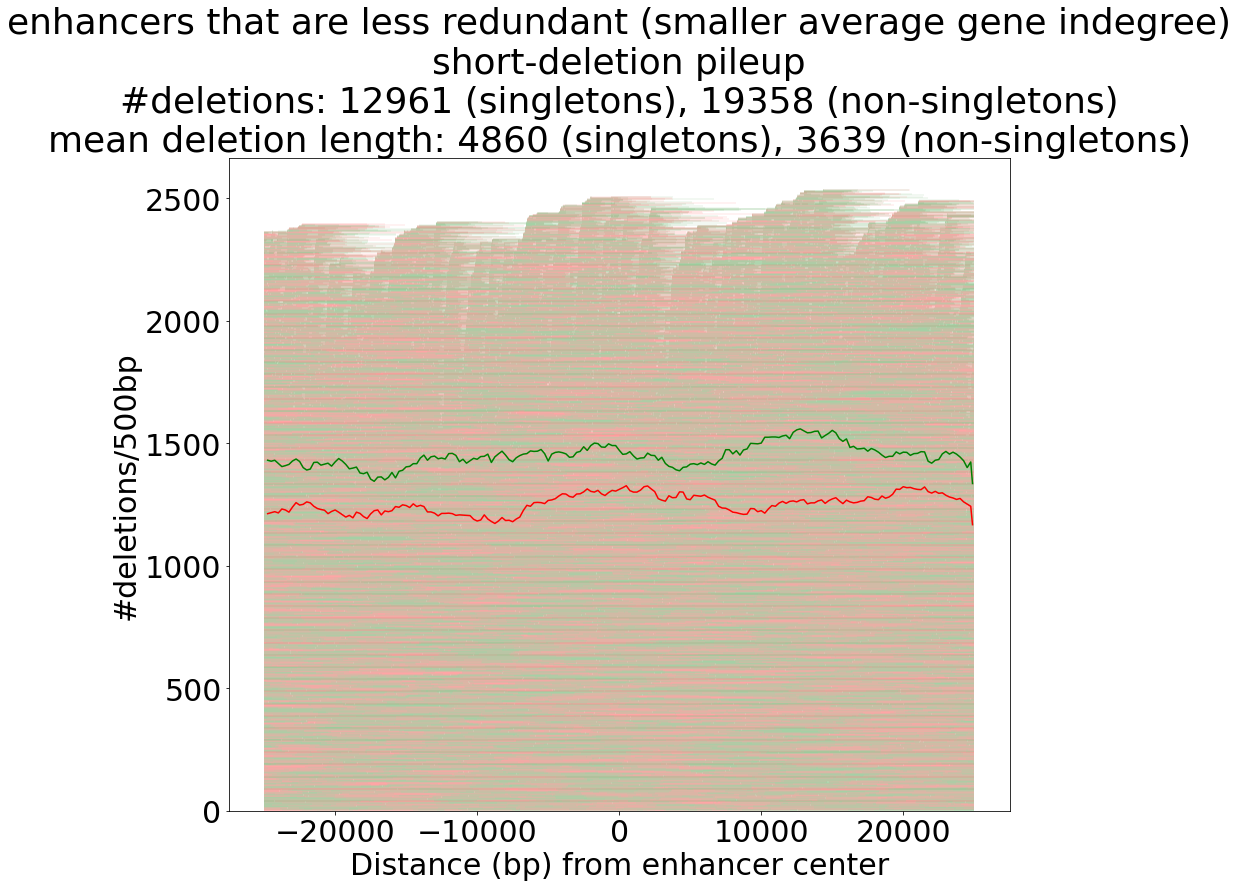

Wrote windows with deletion overlaps to: /scratch/ucgd/lustre-work/quinlan/data-shared/constraint-tools/enhancer-straddling-windows/khurana/enhancer-straddling-windows-intersect-long-observed-deletions.bed



Wrote deletions: /scratch/ucgd/lustre-work/quinlan/data-shared/constraint-tools/enhancer-straddling-windows/khurana/long-observed-singleton-deletions.bed


Wrote coverage: /scratch/ucgd/lustre-work/quinlan/data-shared/constraint-tools/enhancer-straddling-windows/khurana/long-observed-singleton-deletions-coverage.bed



Wrote deletions: /scratch/ucgd/lustre-work/quinlan/data-shared/constraint-tools/enhancer-straddling-windows/khurana/long-observed-non-singleton-deletions.bed


Wrote coverage: /scratch/ucgd/lustre-work/quinlan/data-shared/constraint-tools/enhancer-straddling-windows/khurana/long-observed-non-singleton-deletions-coverage.bed



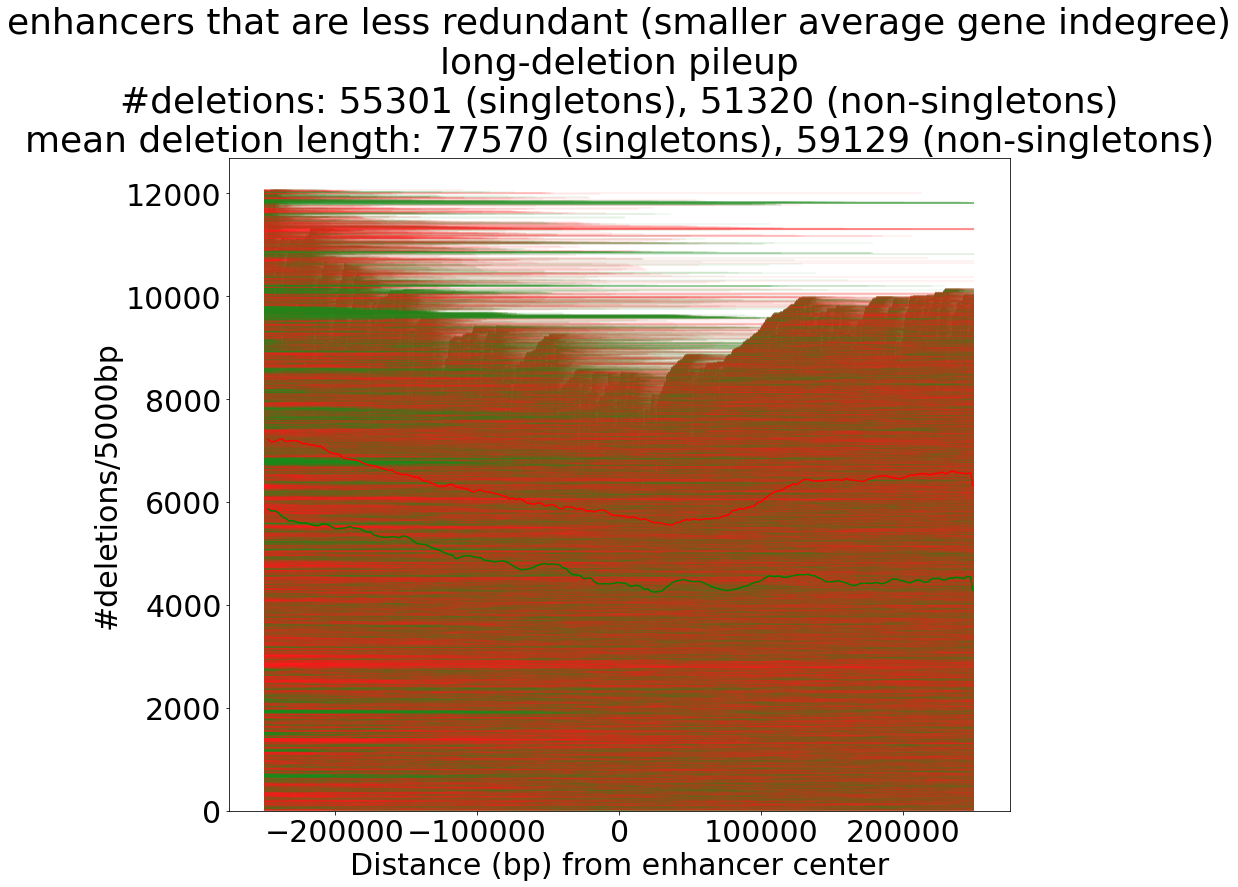

Wrote windows with deletion overlaps to: /scratch/ucgd/lustre-work/quinlan/data-shared/constraint-tools/enhancer-straddling-windows/khurana/enhancer-straddling-windows-intersect-short-observed-deletions.bed



Wrote deletions: /scratch/ucgd/lustre-work/quinlan/data-shared/constraint-tools/enhancer-straddling-windows/khurana/short-observed-singleton-deletions.bed


Wrote coverage: /scratch/ucgd/lustre-work/quinlan/data-shared/constraint-tools/enhancer-straddling-windows/khurana/short-observed-singleton-deletions-coverage.bed



Wrote deletions: /scratch/ucgd/lustre-work/quinlan/data-shared/constraint-tools/enhancer-straddling-windows/khurana/short-observed-non-singleton-deletions.bed


Wrote coverage: /scratch/ucgd/lustre-work/quinlan/data-shared/constraint-tools/enhancer-straddling-windows/khurana/short-observed-non-singleton-deletions-coverage.bed



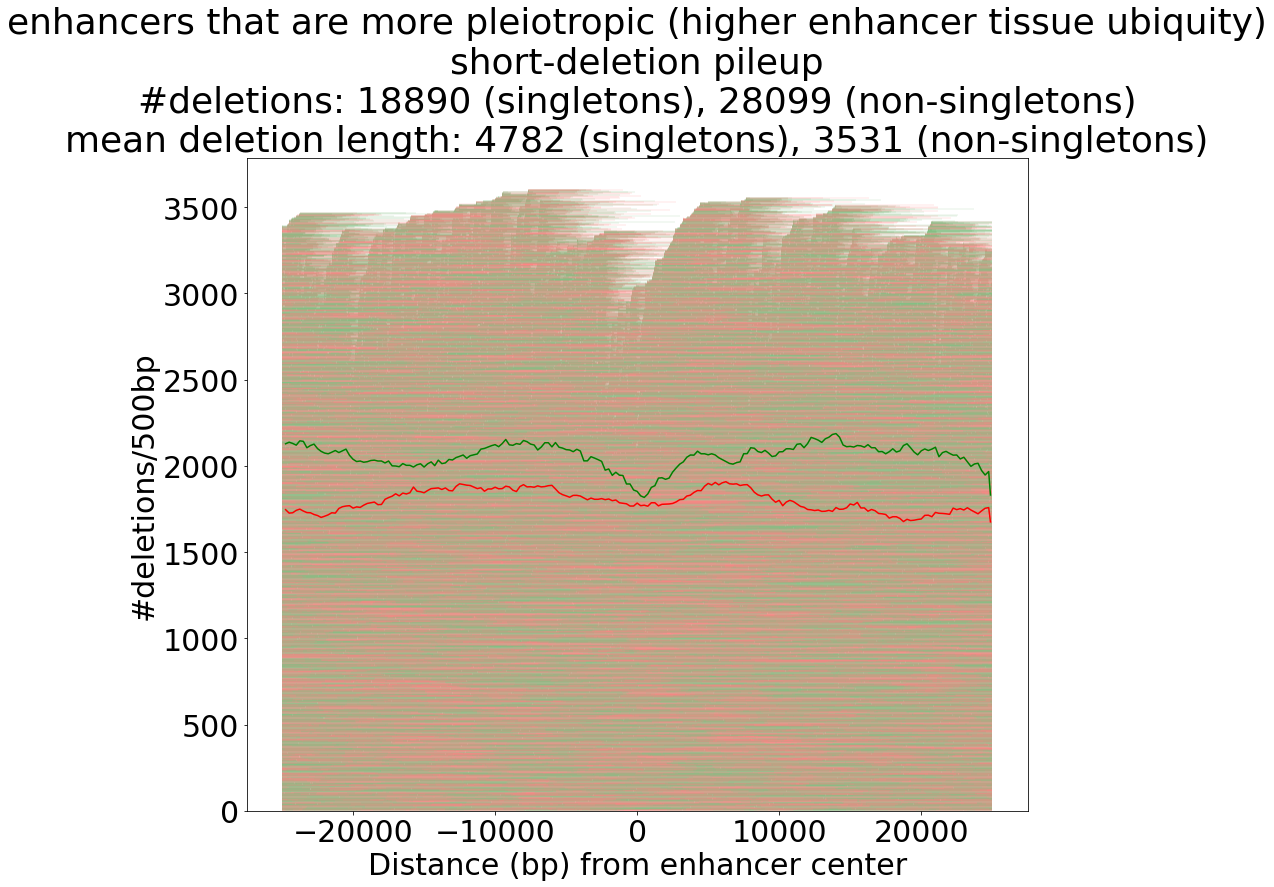

Wrote windows with deletion overlaps to: /scratch/ucgd/lustre-work/quinlan/data-shared/constraint-tools/enhancer-straddling-windows/khurana/enhancer-straddling-windows-intersect-long-observed-deletions.bed



Wrote deletions: /scratch/ucgd/lustre-work/quinlan/data-shared/constraint-tools/enhancer-straddling-windows/khurana/long-observed-singleton-deletions.bed


Wrote coverage: /scratch/ucgd/lustre-work/quinlan/data-shared/constraint-tools/enhancer-straddling-windows/khurana/long-observed-singleton-deletions-coverage.bed



Wrote deletions: /scratch/ucgd/lustre-work/quinlan/data-shared/constraint-tools/enhancer-straddling-windows/khurana/long-observed-non-singleton-deletions.bed


Wrote coverage: /scratch/ucgd/lustre-work/quinlan/data-shared/constraint-tools/enhancer-straddling-windows/khurana/long-observed-non-singleton-deletions-coverage.bed



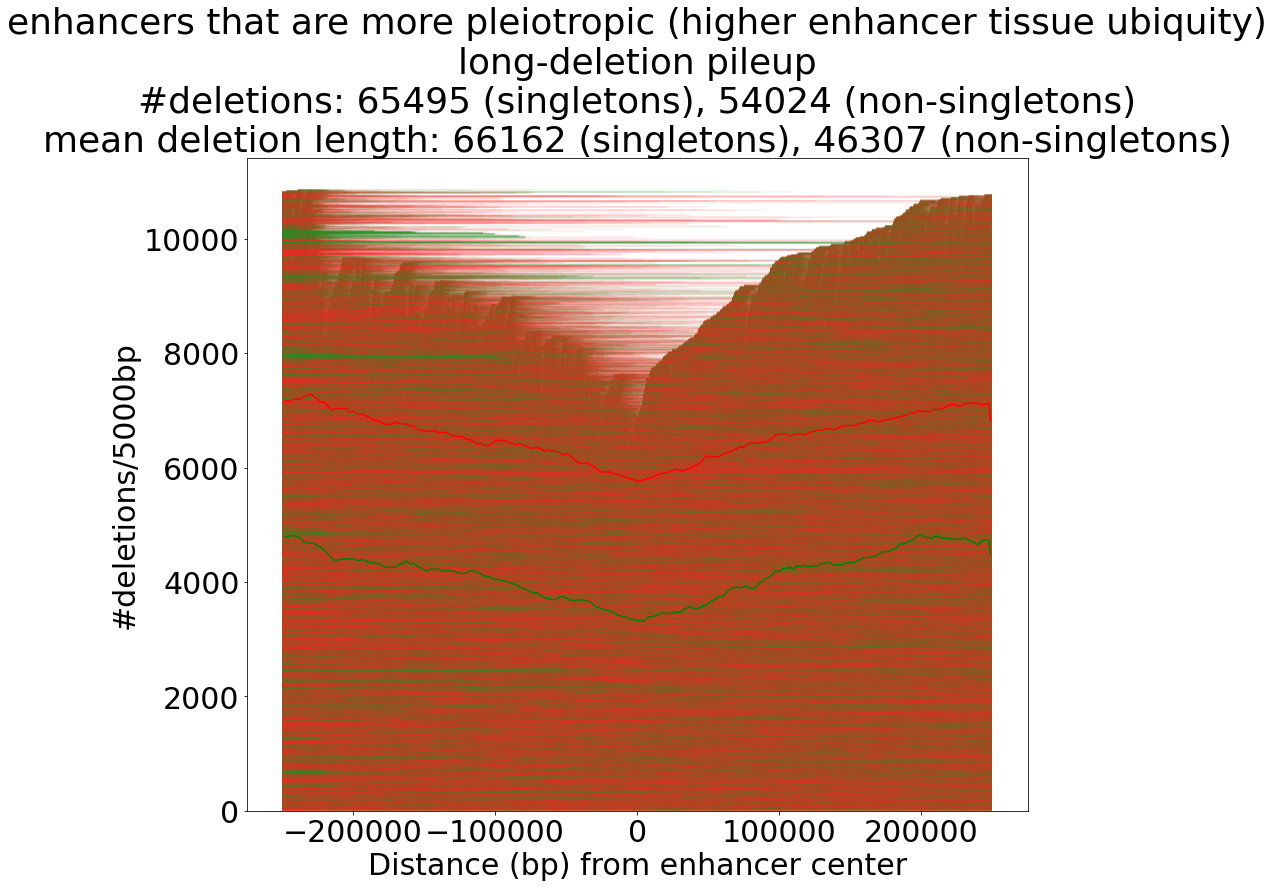

Wrote windows with deletion overlaps to: /scratch/ucgd/lustre-work/quinlan/data-shared/constraint-tools/enhancer-straddling-windows/khurana/enhancer-straddling-windows-intersect-short-observed-deletions.bed



Wrote deletions: /scratch/ucgd/lustre-work/quinlan/data-shared/constraint-tools/enhancer-straddling-windows/khurana/short-observed-singleton-deletions.bed


Wrote coverage: /scratch/ucgd/lustre-work/quinlan/data-shared/constraint-tools/enhancer-straddling-windows/khurana/short-observed-singleton-deletions-coverage.bed



Wrote deletions: /scratch/ucgd/lustre-work/quinlan/data-shared/constraint-tools/enhancer-straddling-windows/khurana/short-observed-non-singleton-deletions.bed


Wrote coverage: /scratch/ucgd/lustre-work/quinlan/data-shared/constraint-tools/enhancer-straddling-windows/khurana/short-observed-non-singleton-deletions-coverage.bed



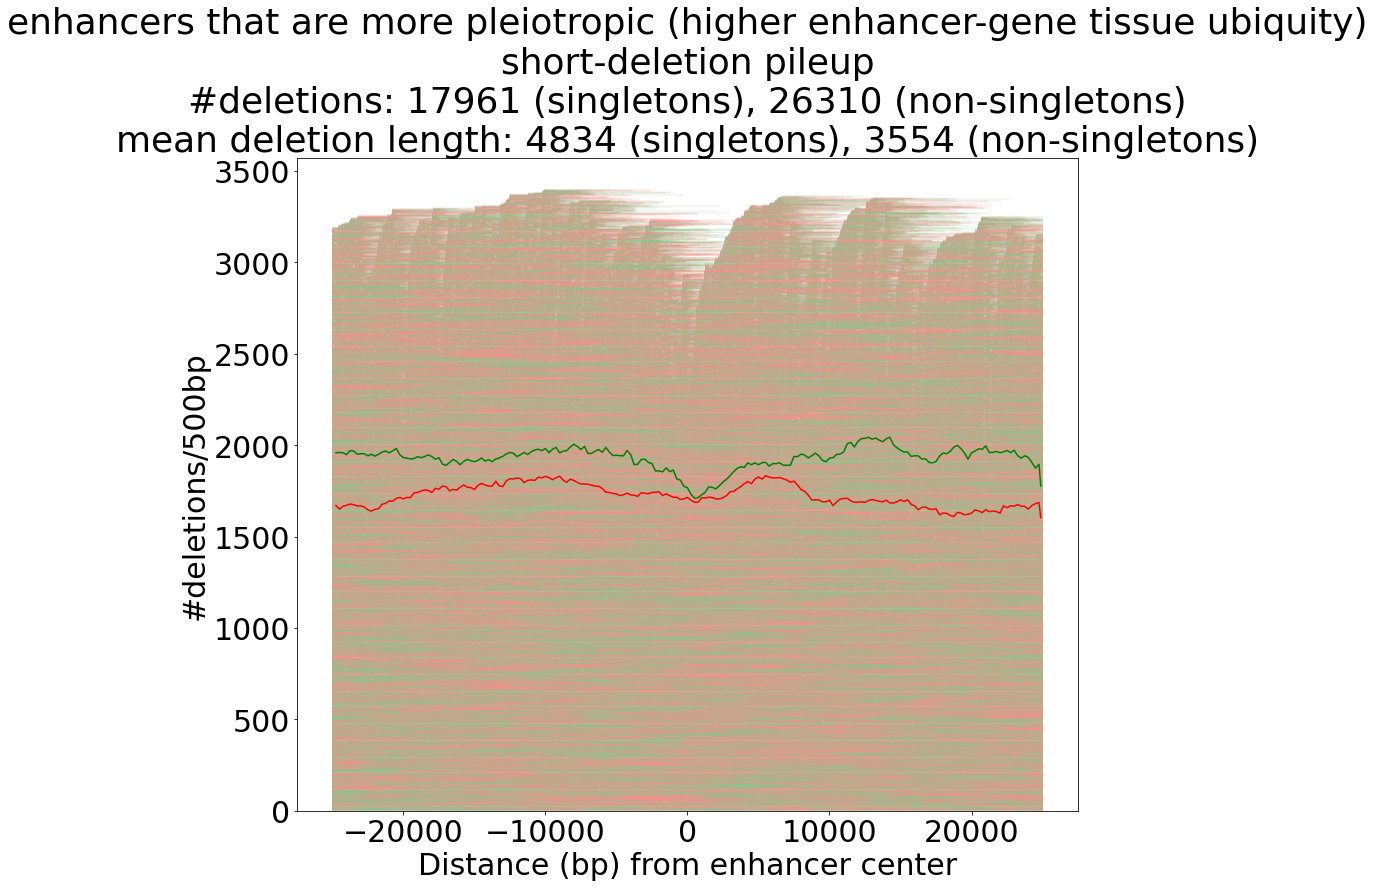

Wrote windows with deletion overlaps to: /scratch/ucgd/lustre-work/quinlan/data-shared/constraint-tools/enhancer-straddling-windows/khurana/enhancer-straddling-windows-intersect-long-observed-deletions.bed



Wrote deletions: /scratch/ucgd/lustre-work/quinlan/data-shared/constraint-tools/enhancer-straddling-windows/khurana/long-observed-singleton-deletions.bed


Wrote coverage: /scratch/ucgd/lustre-work/quinlan/data-shared/constraint-tools/enhancer-straddling-windows/khurana/long-observed-singleton-deletions-coverage.bed



Wrote deletions: /scratch/ucgd/lustre-work/quinlan/data-shared/constraint-tools/enhancer-straddling-windows/khurana/long-observed-non-singleton-deletions.bed


Wrote coverage: /scratch/ucgd/lustre-work/quinlan/data-shared/constraint-tools/enhancer-straddling-windows/khurana/long-observed-non-singleton-deletions-coverage.bed



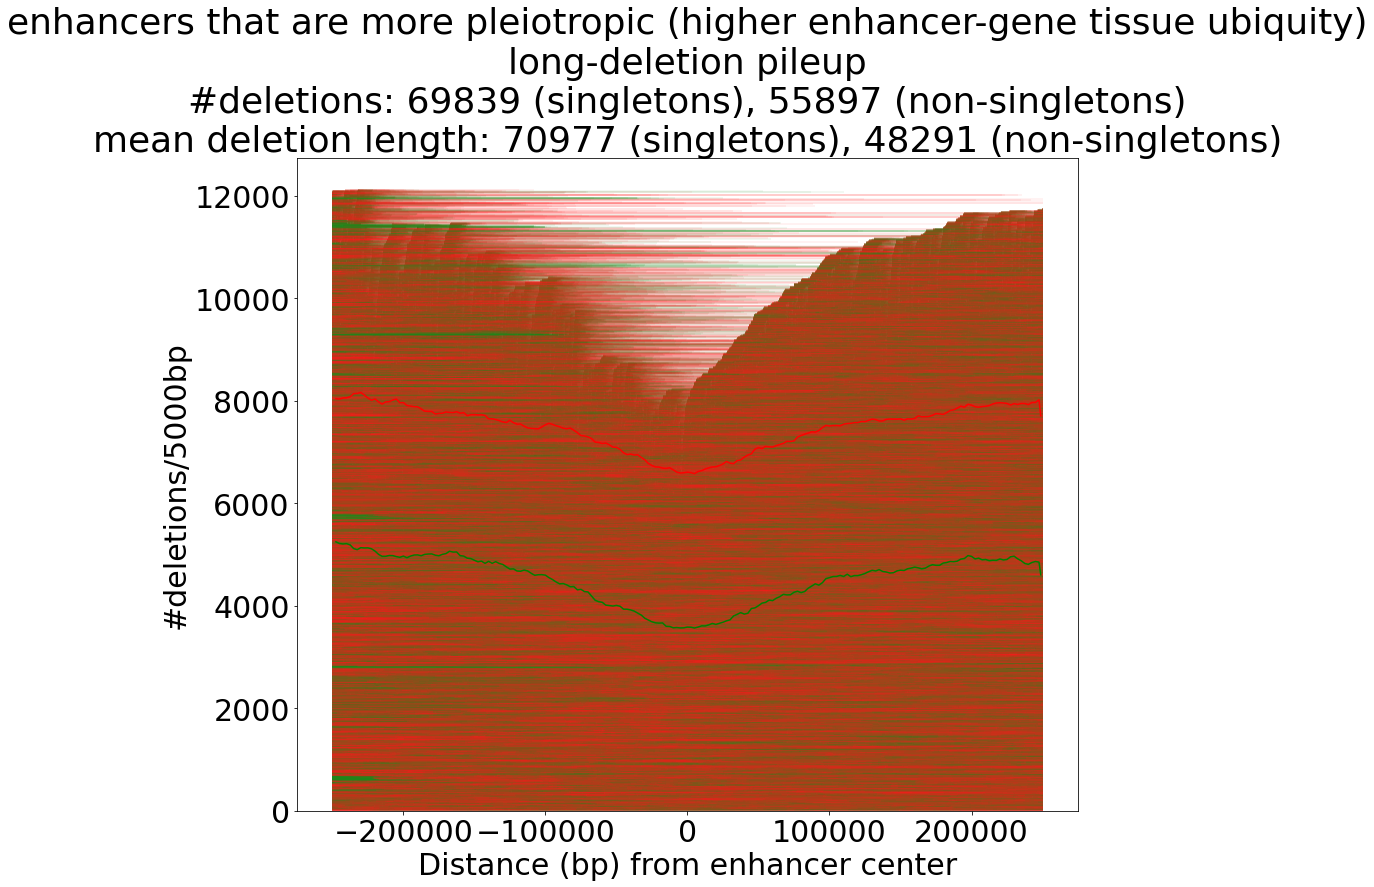

Wrote windows with deletion overlaps to: /scratch/ucgd/lustre-work/quinlan/data-shared/constraint-tools/enhancer-straddling-windows/khurana/enhancer-straddling-windows-intersect-short-observed-deletions.bed



Wrote deletions: /scratch/ucgd/lustre-work/quinlan/data-shared/constraint-tools/enhancer-straddling-windows/khurana/short-observed-singleton-deletions.bed


Wrote coverage: /scratch/ucgd/lustre-work/quinlan/data-shared/constraint-tools/enhancer-straddling-windows/khurana/short-observed-singleton-deletions-coverage.bed



Wrote deletions: /scratch/ucgd/lustre-work/quinlan/data-shared/constraint-tools/enhancer-straddling-windows/khurana/short-observed-non-singleton-deletions.bed


Wrote coverage: /scratch/ucgd/lustre-work/quinlan/data-shared/constraint-tools/enhancer-straddling-windows/khurana/short-observed-non-singleton-deletions-coverage.bed



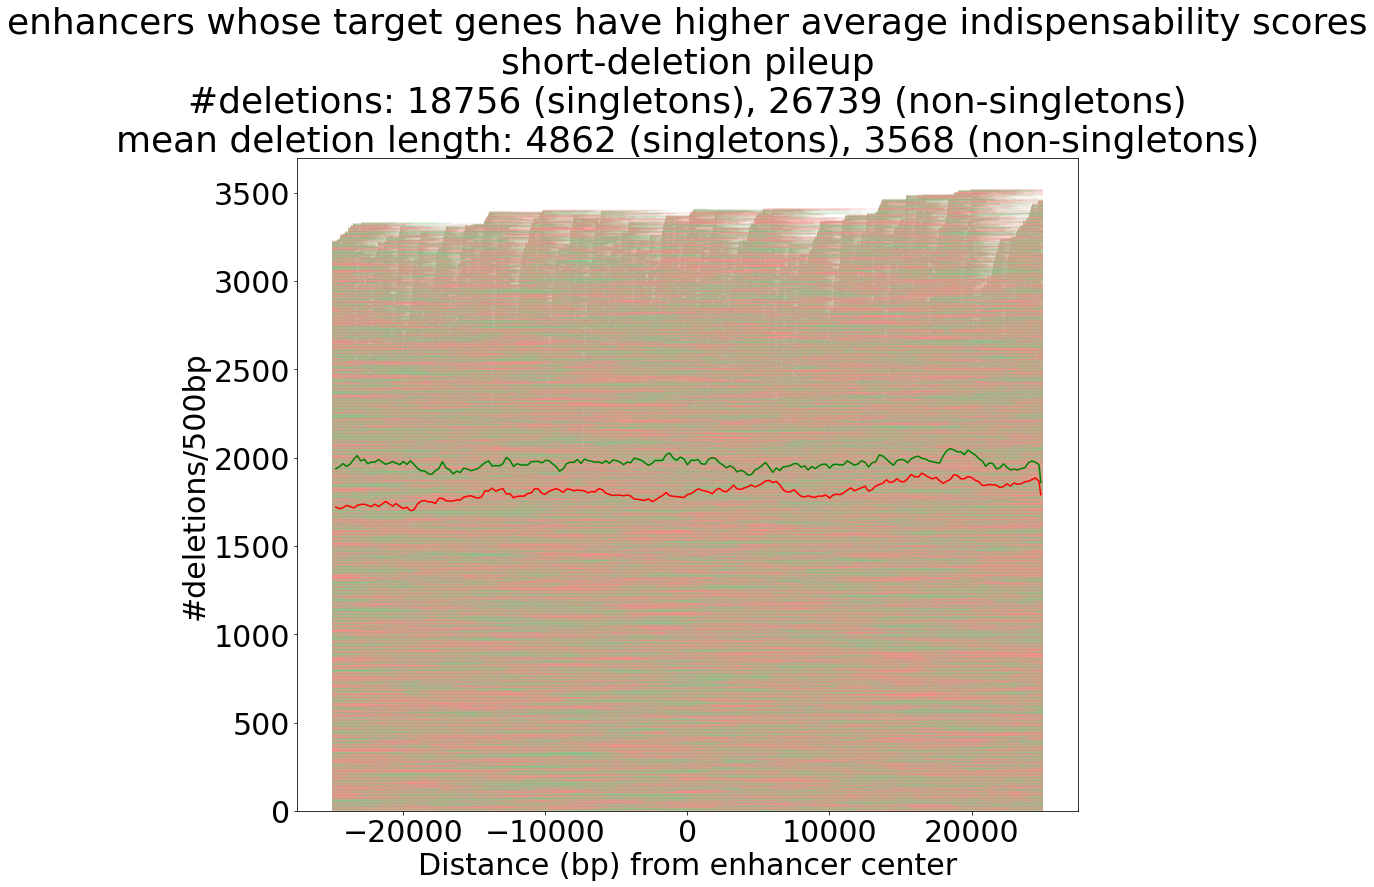

Wrote windows with deletion overlaps to: /scratch/ucgd/lustre-work/quinlan/data-shared/constraint-tools/enhancer-straddling-windows/khurana/enhancer-straddling-windows-intersect-long-observed-deletions.bed



Wrote deletions: /scratch/ucgd/lustre-work/quinlan/data-shared/constraint-tools/enhancer-straddling-windows/khurana/long-observed-singleton-deletions.bed


Wrote coverage: /scratch/ucgd/lustre-work/quinlan/data-shared/constraint-tools/enhancer-straddling-windows/khurana/long-observed-singleton-deletions-coverage.bed



Wrote deletions: /scratch/ucgd/lustre-work/quinlan/data-shared/constraint-tools/enhancer-straddling-windows/khurana/long-observed-non-singleton-deletions.bed


Wrote coverage: /scratch/ucgd/lustre-work/quinlan/data-shared/constraint-tools/enhancer-straddling-windows/khurana/long-observed-non-singleton-deletions-coverage.bed



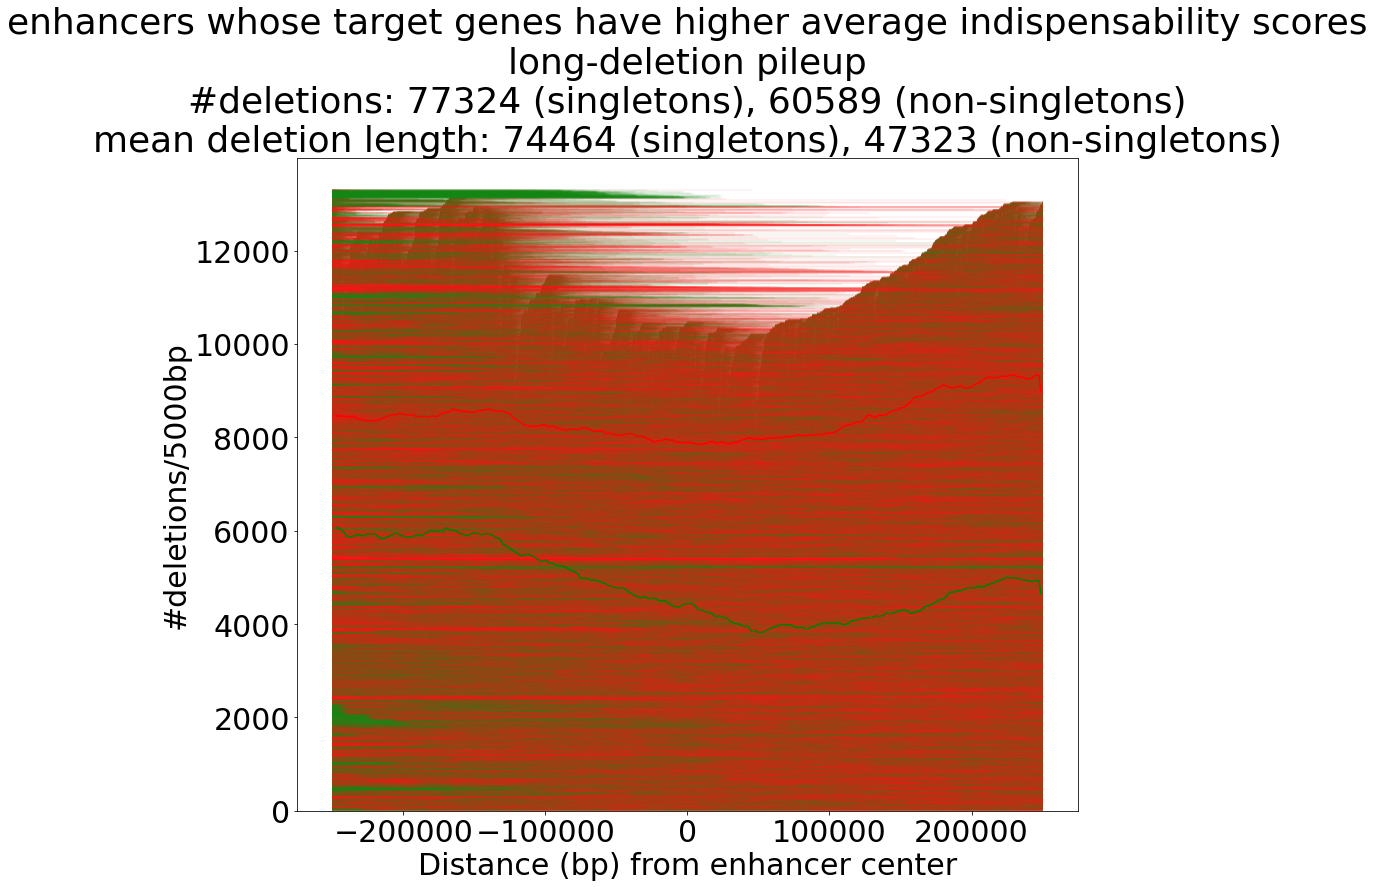

Wrote windows with deletion overlaps to: /scratch/ucgd/lustre-work/quinlan/data-shared/constraint-tools/enhancer-straddling-windows/khurana/enhancer-straddling-windows-intersect-short-observed-deletions.bed



Wrote deletions: /scratch/ucgd/lustre-work/quinlan/data-shared/constraint-tools/enhancer-straddling-windows/khurana/short-observed-singleton-deletions.bed


Wrote coverage: /scratch/ucgd/lustre-work/quinlan/data-shared/constraint-tools/enhancer-straddling-windows/khurana/short-observed-singleton-deletions-coverage.bed



Wrote deletions: /scratch/ucgd/lustre-work/quinlan/data-shared/constraint-tools/enhancer-straddling-windows/khurana/short-observed-non-singleton-deletions.bed


Wrote coverage: /scratch/ucgd/lustre-work/quinlan/data-shared/constraint-tools/enhancer-straddling-windows/khurana/short-observed-non-singleton-deletions-coverage.bed



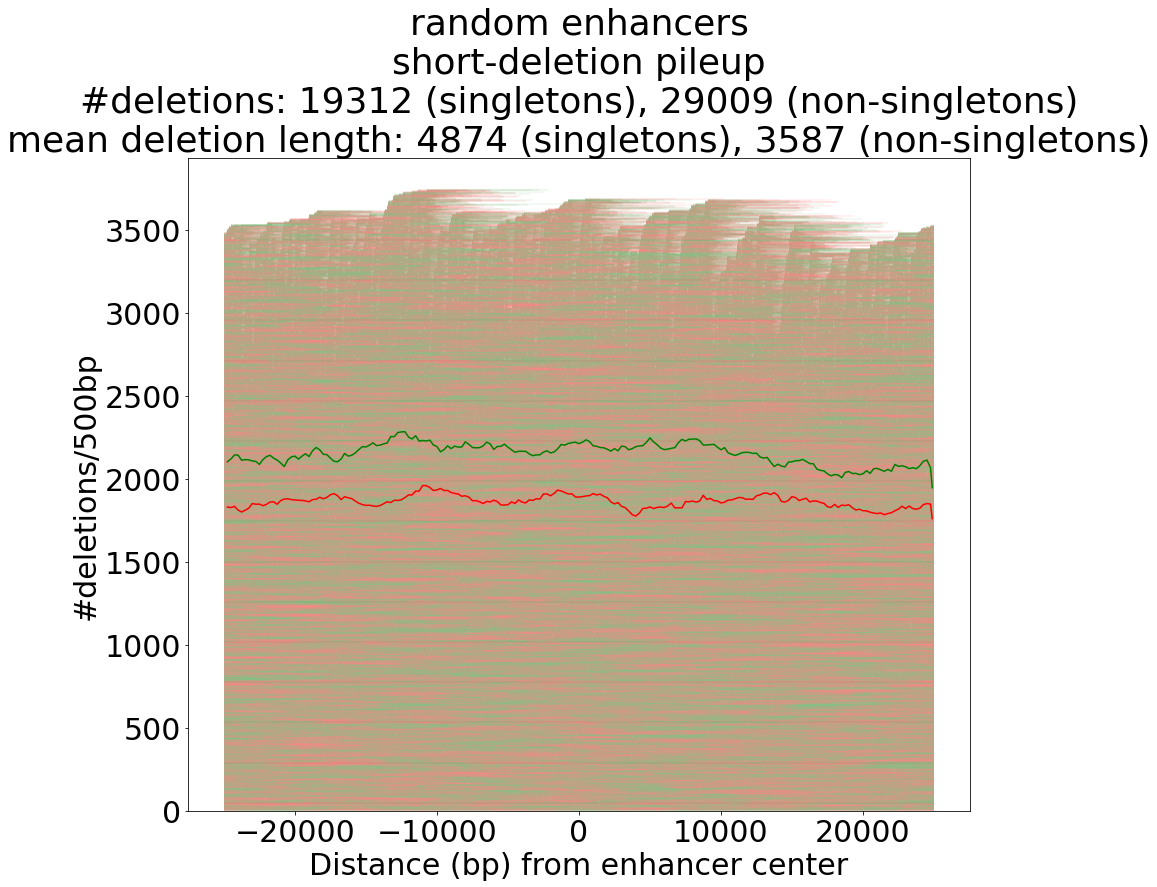

Wrote windows with deletion overlaps to: /scratch/ucgd/lustre-work/quinlan/data-shared/constraint-tools/enhancer-straddling-windows/khurana/enhancer-straddling-windows-intersect-long-observed-deletions.bed



Wrote deletions: /scratch/ucgd/lustre-work/quinlan/data-shared/constraint-tools/enhancer-straddling-windows/khurana/long-observed-singleton-deletions.bed


Wrote coverage: /scratch/ucgd/lustre-work/quinlan/data-shared/constraint-tools/enhancer-straddling-windows/khurana/long-observed-singleton-deletions-coverage.bed



Wrote deletions: /scratch/ucgd/lustre-work/quinlan/data-shared/constraint-tools/enhancer-straddling-windows/khurana/long-observed-non-singleton-deletions.bed


Wrote coverage: /scratch/ucgd/lustre-work/quinlan/data-shared/constraint-tools/enhancer-straddling-windows/khurana/long-observed-non-singleton-deletions-coverage.bed



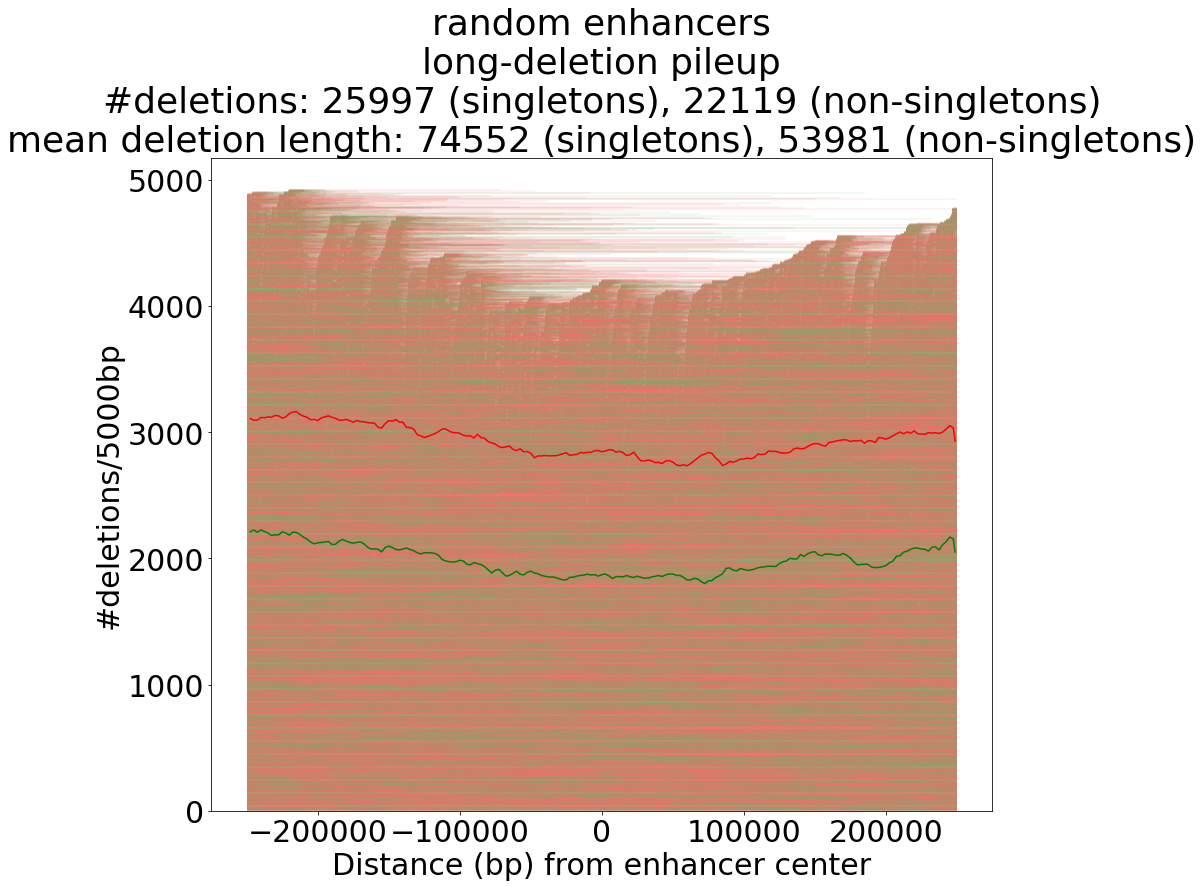

Wrote windows with deletion overlaps to: /scratch/ucgd/lustre-work/quinlan/data-shared/constraint-tools/enhancer-straddling-windows/khurana/enhancer-straddling-windows-intersect-short-observed-deletions.bed



Wrote deletions: /scratch/ucgd/lustre-work/quinlan/data-shared/constraint-tools/enhancer-straddling-windows/khurana/short-observed-singleton-deletions.bed


Wrote coverage: /scratch/ucgd/lustre-work/quinlan/data-shared/constraint-tools/enhancer-straddling-windows/khurana/short-observed-singleton-deletions-coverage.bed



Wrote deletions: /scratch/ucgd/lustre-work/quinlan/data-shared/constraint-tools/enhancer-straddling-windows/khurana/short-observed-non-singleton-deletions.bed


Wrote coverage: /scratch/ucgd/lustre-work/quinlan/data-shared/constraint-tools/enhancer-straddling-windows/khurana/short-observed-non-singleton-deletions-coverage.bed



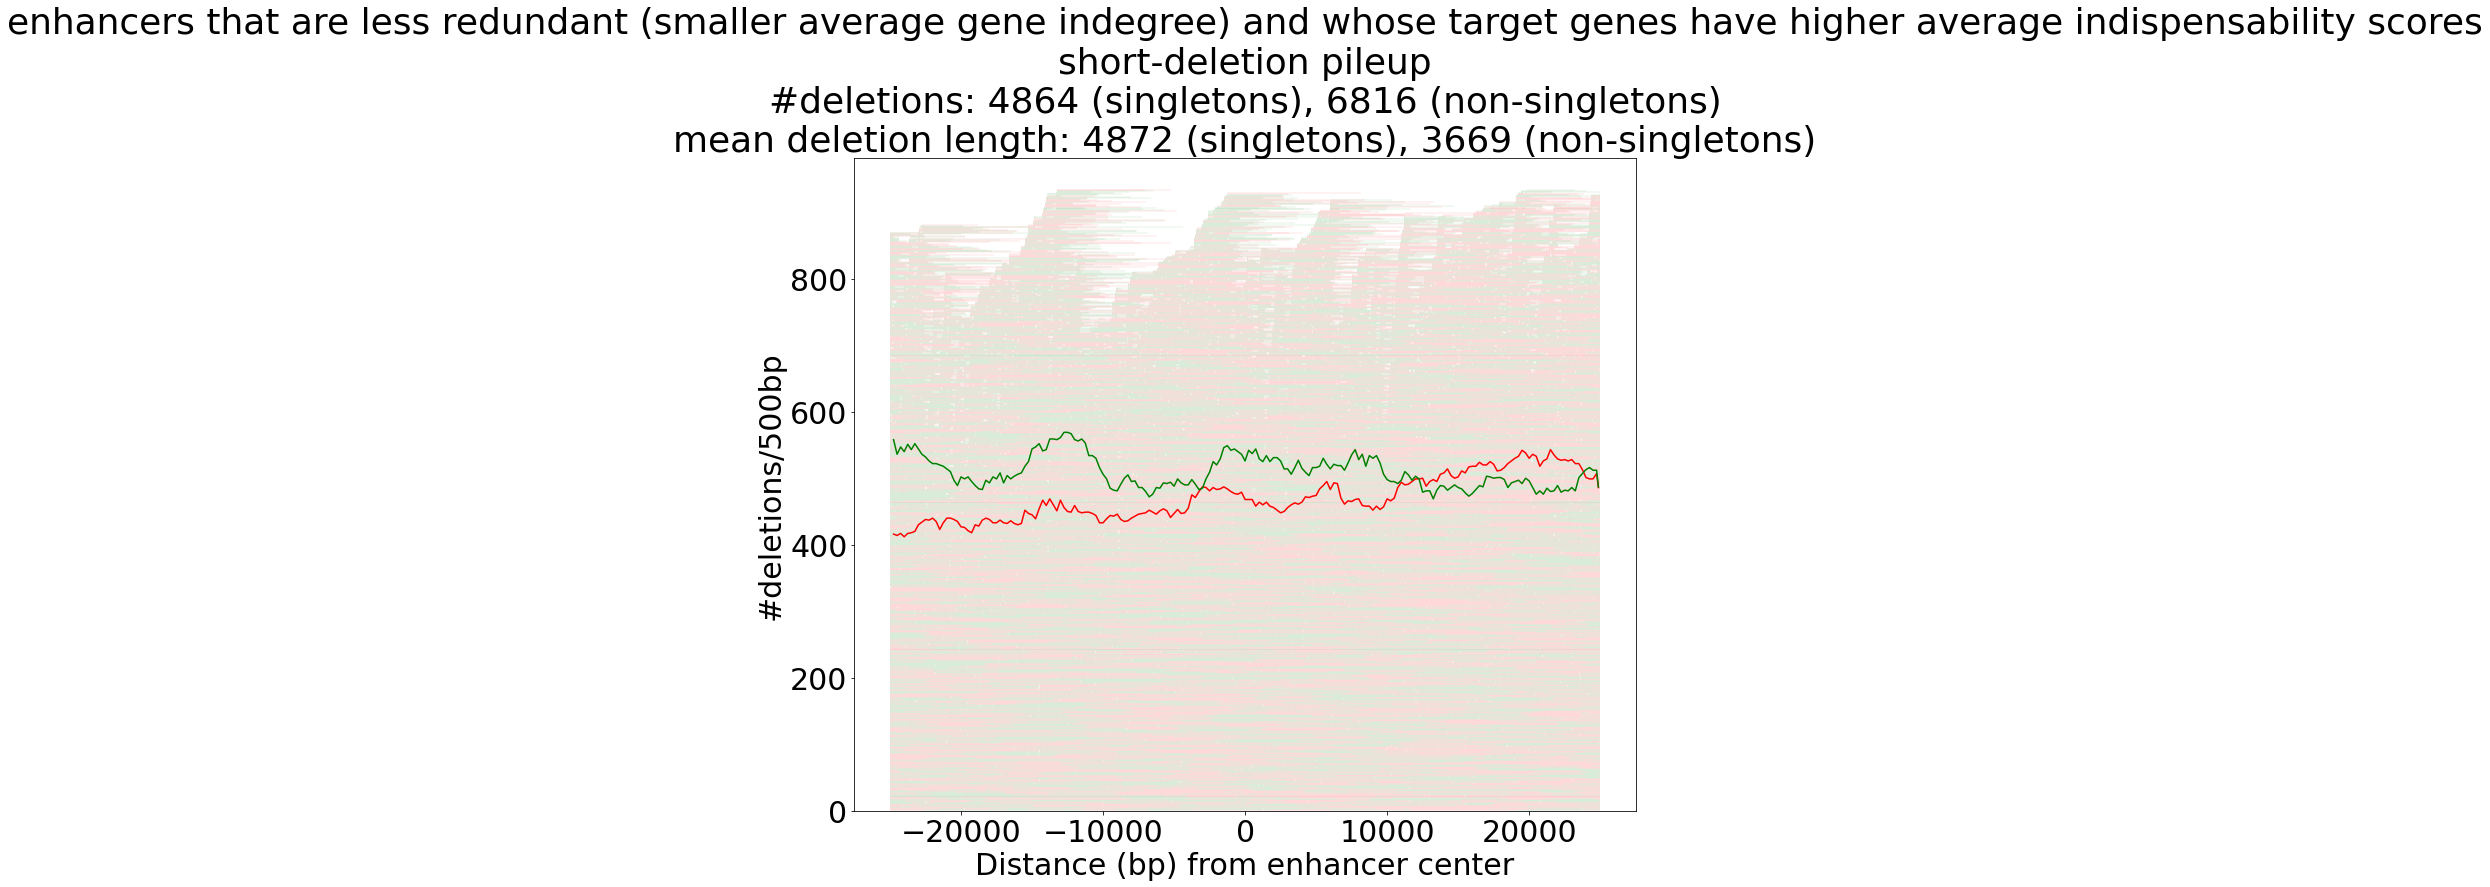

Wrote windows with deletion overlaps to: /scratch/ucgd/lustre-work/quinlan/data-shared/constraint-tools/enhancer-straddling-windows/khurana/enhancer-straddling-windows-intersect-long-observed-deletions.bed



Wrote deletions: /scratch/ucgd/lustre-work/quinlan/data-shared/constraint-tools/enhancer-straddling-windows/khurana/long-observed-singleton-deletions.bed


Wrote coverage: /scratch/ucgd/lustre-work/quinlan/data-shared/constraint-tools/enhancer-straddling-windows/khurana/long-observed-singleton-deletions-coverage.bed



Wrote deletions: /scratch/ucgd/lustre-work/quinlan/data-shared/constraint-tools/enhancer-straddling-windows/khurana/long-observed-non-singleton-deletions.bed


Wrote coverage: /scratch/ucgd/lustre-work/quinlan/data-shared/constraint-tools/enhancer-straddling-windows/khurana/long-observed-non-singleton-deletions-coverage.bed



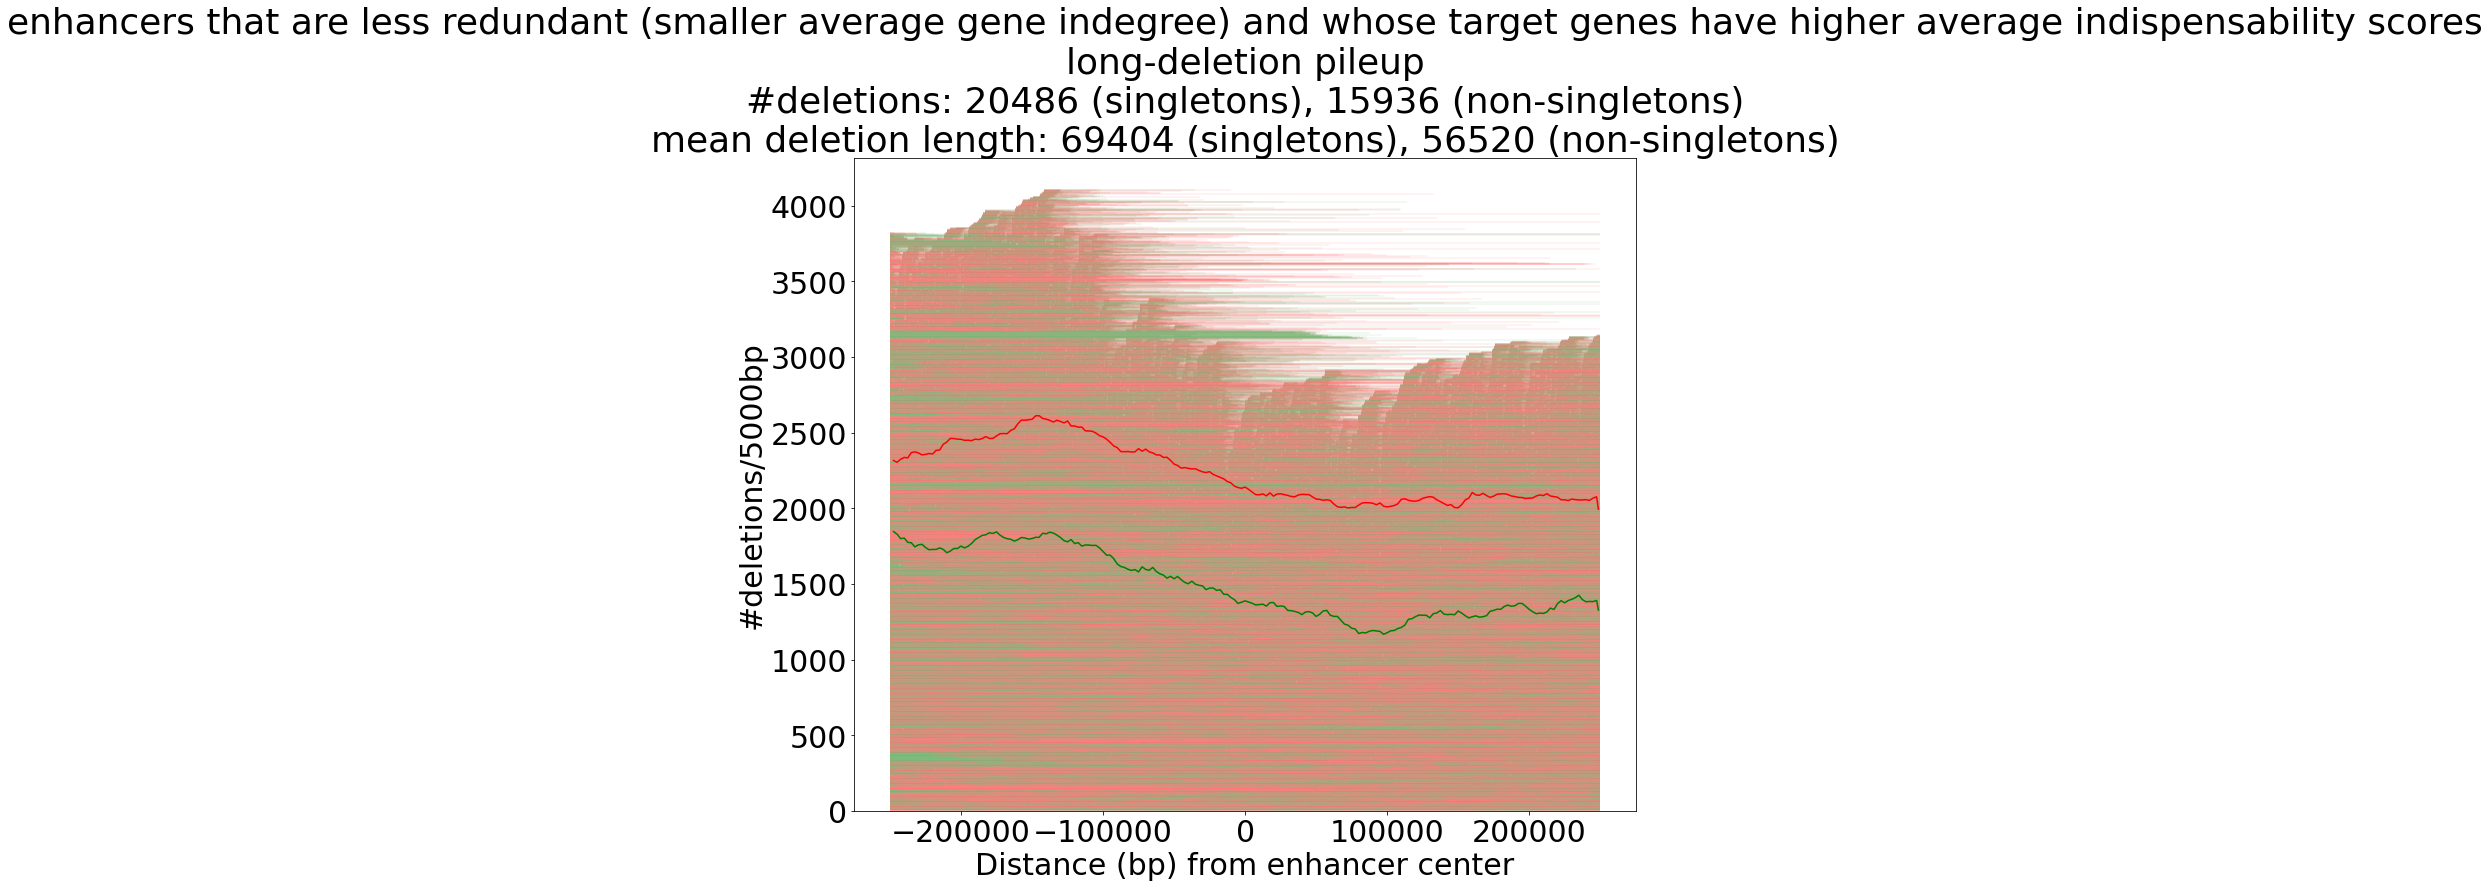

In [15]:
for filter_enhancers in [
  filter_1, 
  filter_2, 
  filter_3, 
  filter_4, 
  filter_5,
  filter_6,
]: 
  for deletion_type, window_size, ymax in zip(
    ['short', 'long'],
    [50000, 500000],
    [None]*2
  ): 
    plot_pileup_and_coverage(
      deletion_type, 
      window_size,
      ymax, 
      plot_coverage=True,
      filter_enhancers=filter_enhancers
    )